# Data Science and AI mini-project
## Dataset used: Gas Transmission & Gathering Incident Data - January 2010 to present
### Source: U.S. Department of transportation (https://www.phmsa.dot.gov/data-and-statistics/pipeline/distribution-transmission-gathering-lng-and-liquid-accident-and-incident-data or https://www.kaggle.com/usdot/pipeline-accidents)

# _____________________________________________________________

### Note: If you do not have geopandas, you can install its dependencies in the Anaconda promt using the following command:

##### pip install wheel
##### pip install pipwin

##### pipwin install numpy
##### pipwin install pandas
##### pipwin install shapely
##### pipwin install gdal
##### pipwin install fiona
##### pipwin install pyproj
##### pipwin install six
##### pipwin install rtree
##### pipwin install geopandas

 
 # First things first, we import all necessary libraries

In [1]:
# Data analysis and wranglig libraries

import pandas as pd
import numpy as np
import random as rd
import missingno as msno

# Visualization libraries

import seaborn as sb
import matplotlib.pyplot as plot

# Plot everything in notebook itself
%matplotlib inline 

# Machine Learning 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


 # Let's see what data are we dealing with! 

In [2]:
data = pd.read_csv('database.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Report Number                         2795 non-null   int64  
 1   Supplemental Number                   2795 non-null   int64  
 2   Accident Year                         2795 non-null   int64  
 3   Accident Date/Time                    2795 non-null   object 
 4   Operator ID                           2795 non-null   int64  
 5   Operator Name                         2795 non-null   object 
 6   Pipeline/Facility Name                2674 non-null   object 
 7   Pipeline Location                     2795 non-null   object 
 8   Pipeline Type                         2777 non-null   object 
 9   Liquid Type                           2795 non-null   object 
 10  Liquid Subtype                        1349 non-null   object 
 11  Liquid Name      

# Note that for variables 29 to 40, there are almost no non-null values. The information in those columns might not give us much predicting power!

In [3]:
data.head()

Report Number  Supplemental Number  Accident Year Accident Date/Time  \
0       20100016                17305           2010   1/1/2010 7:15 AM   
1       20100254                17331           2010   1/4/2010 8:30 AM   
2       20100038                17747           2010  1/5/2010 10:30 AM   
3       20100260                18574           2010   1/6/2010 7:30 PM   
4       20100030                16276           2010   1/7/2010 1:00 PM   

   Operator ID                         Operator Name Pipeline/Facility Name  \
0        32109                 ONEOK NGL PIPELINE LP      KINDER MORGAN JCT   
1        15786                PORTLAND PIPELINE CORP      24-INCH MAIN LINE   
2        20160           PETROLOGISTICS OLEFINS, LLC                    NaN   
3        11169  ENBRIDGE ENERGY, LIMITED PARTNERSHIP      SUPERIOR TERMINAL   
4          300                 PLAINS PIPELINE, L.P.         RED RIVER EAST   

  Pipeline Location Pipeline Type                                 Liquid Type  \
0           ONSHORE   ABOVEGROUND  HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS   
1           ONSHORE   ABOVEGROUND                                   CRUDE OIL   
2           ONSHORE   ABOVEGROUND  HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS   
3           ONSHORE   UNDERGROUND                                   CRUDE OIL   
4           ONSHORE   UNDERGROUND                                   CRUDE OIL   

   ... Other Fatalities Public Fatalities All Fatalities  \
0  ...              NaN               NaN            NaN   
1  ...              NaN               NaN            NaN   
2  ...              NaN               NaN            NaN   
3  ...              NaN               NaN            NaN   
4  ...              NaN               NaN            NaN   

  Property Damage Costs Lost Commodity Costs  \
0                 110.0               1517.0   
1                4000.0                  8.0   
2                   0.0                200.0   
3                 200.0                 40.0   
4               20000.0                150.0   

   Public/Private Property Damage Costs  Emergency Response Costs  \
0                                   0.0                       0.0   
1                                   0.0                       0.0   
2                                   0.0                       0.0   
3                                   0.0                   11300.0   
4                                   0.0                    7500.0   

  Environmental Remediation Costs Other Costs  All Costs  
0                             0.0         0.0       1627  
1                             0.0         0.0       4008  
2                             0.0         0.0        200  
3                             0.0         0.0      11540  
4                          2000.0         0.0      29650  

[5 rows x 48 columns]

# We can see that there are many variables in the data set, let us categorize the data into categorical and numerical data: 

In [4]:
# Get names of columns
data.columns

Index(['Report Number', 'Supplemental Number', 'Accident Year',
       'Accident Date/Time', 'Operator ID', 'Operator Name',
       'Pipeline/Facility Name', 'Pipeline Location', 'Pipeline Type',
       'Liquid Type', 'Liquid Subtype', 'Liquid Name', 'Accident City',
       'Accident County', 'Accident State', 'Accident Latitude',
       'Accident Longitude', 'Cause Category', 'Cause Subcategory',
       'Unintentional Release (Barrels)', 'Intentional Release (Barrels)',
       'Liquid Recovery (Barrels)', 'Net Loss (Barrels)', 'Liquid Ignition',
       'Liquid Explosion', 'Pipeline Shutdown', 'Shutdown Date/Time',
       'Restart Date/Time', 'Public Evacuations', 'Operator Employee Injuries',
       'Operator Contractor Injuries', 'Emergency Responder Injuries',
       'Other Injuries', 'Public Injuries', 'All Injuries',
       'Operator Employee Fatalities', 'Operator Contractor Fatalities',
       'Emergency Responder Fatalities', 'Other Fatalities',
       'Public Fatalities', 'All

In [5]:
# Seperate data into categorical and numerical

cat_var = data[['Report Number', 'Supplemental Number','Operator ID', 'Operator Name',
       'Pipeline/Facility Name', 'Pipeline Location', 'Pipeline Type',
       'Liquid Type', 'Liquid Subtype', 'Liquid Name', 'Accident City',
       'Accident County', 'Accident State','Cause Category', 'Cause Subcategory','Liquid Ignition',
       'Liquid Explosion', 'Pipeline Shutdown']]
num_var = data[['Accident Date/Time','Accident Latitude','Accident Longitude','Unintentional Release (Barrels)', 'Intentional Release (Barrels)',
       'Liquid Recovery (Barrels)', 'Net Loss (Barrels)','Shutdown Date/Time',
       'Restart Date/Time','Accident Year','Public Evacuations', 'Operator Employee Injuries',
       'Operator Contractor Injuries', 'Emergency Responder Injuries',
       'Other Injuries', 'Public Injuries', 'All Injuries',
       'Operator Employee Fatalities', 'Operator Contractor Fatalities',
       'Emergency Responder Fatalities', 'Other Fatalities',
       'Public Fatalities', 'All Fatalities', 'Property Damage Costs',
       'Lost Commodity Costs', 'Public/Private Property Damage Costs',
       'Emergency Response Costs', 'Environmental Remediation Costs',
       'Other Costs', 'All Costs']]

# Lets look at the general properties of the categorical variables 

In [6]:
cat_var[['Report Number', 'Supplemental Number','Operator ID']] = cat_var[['Report Number', 'Supplemental Number','Operator ID']].values.astype(str)

C:\Users\San\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\San\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [7]:
cat_var.describe(include='object')

Report Number Supplemental Number Operator ID  \
count           2795                2795        2795   
unique          2795                2795         213   
top         20160186               17846       30829   
freq               1                   1         201   

                        Operator Name    Pipeline/Facility Name  \
count                            2795                      2674   
unique                            229                      1977   
top     ENTERPRISE CRUDE PIPELINE LLC  WYOMING PIPELINE COMPANY   
freq                              195                        20   

       Pipeline Location Pipeline Type Liquid Type  \
count               2795          2777        2795   
unique                 2             4           5   
top              ONSHORE   ABOVEGROUND   CRUDE OIL   
freq                2777          1475        1398   

                              Liquid Subtype Liquid Name Accident City  \
count                                   1349         222          2480   
unique                                     8          69          1027   
top     DIESEL, FUEL OIL, KEROSENE, JET FUEL     PROPANE       CUSHING   
freq                                     408          26            78   

       Accident County Accident State               Cause Category  \
count             2720           2783                         2795   
unique             678             46                            7   
top             HARRIS             TX  MATERIAL/WELD/EQUIP FAILURE   
freq               167           1004                         1435   

       Cause Subcategory Liquid Ignition Liquid Explosion Pipeline Shutdown  
count               2795            2795             2795              2583  
unique                38               2                2                 2  
top             INTERNAL              NO               NO               YES  
freq                 362            2700             2780              1395

# Now let's do the same for numerical data

In [8]:
num_var.describe()

Accident Latitude  Accident Longitude  Unintentional Release (Barrels)  \
count        2795.000000         2795.000000                      2795.000000   
mean           35.781608          -95.682691                       207.245843   
std             5.652599           12.328430                      1368.667813   
min            18.448010         -158.099930                         0.000000   
25%            30.909375         -100.587636                         0.480000   
50%            34.925440          -95.488870                         2.000000   
75%            40.264062          -91.089463                        20.000000   
max            70.261265          104.263399                     30565.000000   

       Intentional Release (Barrels)  Liquid Recovery (Barrels)  \
count                    1209.000000                2795.000000   
mean                      238.533623                  75.051792   
std                      2781.771453                 546.188247   
min                         0.000000                   0.000000   
25%                         0.000000                   0.000000   
50%                         0.000000                   0.740000   
75%                         0.000000                   8.000000   
max                     70191.000000               18245.000000   

       Net Loss (Barrels)  Accident Year  Public Evacuations  \
count         2795.000000    2795.000000         2338.000000   
mean           132.194050    2013.187835            0.964072   
std           1185.019252       1.972102           18.151398   
min              0.000000    2010.000000            0.000000   
25%              0.000000    2012.000000            0.000000   
50%              0.000000    2013.000000            0.000000   
75%              2.000000    2015.000000            0.000000   
max          30565.000000    2017.000000          700.000000   

       Operator Employee Injuries  Operator Contractor Injuries  ...  \
count                   12.000000                       12.0000  ...   
mean                     0.250000                        1.0000  ...   
std                      0.452267                        1.3484  ...   
min                      0.000000                        0.0000  ...   
25%                      0.000000                        0.0000  ...   
50%                      0.000000                        0.5000  ...   
75%                      0.250000                        1.2500  ...   
max                      1.000000                        4.0000  ...   

       Other Fatalities  Public Fatalities  All Fatalities  \
count          8.000000           8.000000         8.00000   
mean           0.125000           0.625000         1.25000   
std            0.353553           0.744024         0.46291   
min            0.000000           0.000000         1.00000   
25%            0.000000           0.000000         1.00000   
50%            0.000000           0.500000         1.00000   
75%            0.000000           1.000000         1.25000   
max            1.000000           2.000000         2.00000   

       Property Damage Costs  Lost Commodity Costs  \
count           2.788000e+03          2.791000e+03   
mean            1.122963e+05          9.805299e+03   
std             8.709947e+05          6.384075e+04   
min             0.000000e+00          0.000000e+00   
25%             1.000000e+02          2.000000e+01   
50%             3.000000e+03          1.000000e+02   
75%             2.500000e+04          7.000000e+02   
max             2.700000e+07          1.417839e+06   

       Public/Private Property Damage Costs  Emergency Response Costs  \
count                          2.785000e+03              2.789000e+03   
mean                           2.512195e+04              2.918911e+05   
std                            5.243581e+05              4.617076e+06   
min                            0.000000e+00              0.000000e+00   
25%                            0.000

# There are some interesting features in the data:

# Categorical:

### 1) ENTERPRISE CRUDE PIPELINE LLC is involved in  195 out of 2795 incidents (~7% of all cases) - do some operators have a tendency to cause accidents due to safety culture, etc.?
### 2)  Almost all incidents happen onshore (2777 out of 2795) -  Does the onshore/offshore nature of incident affect pipeline shutdown?
###  3) The most common cause of incidents is 'MATERIAL/WELD/EQUIP FAILURE' - Do some causes result in pipeline shutdown more with a higher chance?
###  4) Majority of accidents did not cause an explosion - or what we Chemical Engineers call 'Bleve'. In a module called plant safety, I learnt that the probability of explosion is highly correllated with the substance being processed - are some of the liquids more dangerous such that the pipeline operator is more likely to shut down the pipeline?
(https://en.wikipedia.org/wiki/Boiling_liquid_expanding_vapor_explosion#:~:text=A%20boiling%20liquid%20expanding%20vapor,pressurized%20vessel%20can%20remain%20liquid)

# Numerical:

### 1) On average intentional release of oil is larger than unintentional release, 239 vs 207 Barrels (What??) - There is most likely a correlation between the whether the release is intentional or not ( specifically I expect when an accident is unintentional and spillage is high there will likely to be pipeline shutdown )
###  2) This is a bit morbid, but an inccident on average kills **1.25 person** - How correlated will mortality be to pipeline shutdown be?
### 3) The average incident costs in total 831,400 USD and comprises mainly of Environmental Remediation and Emergency Response Costs. The most expensive accident during 2010-2017 costed a whopping 840 million USD!!! - as these pipeline operators are profit driven companies, the price of an incident will most likely correlate well with pipeline shutdown
### 4) Is the time of the inccident related to the probability of pipeline shutdown? For example, is there a different % of pipeline shutdown during winter and summer?

# Create a version of the data set without null values in the 'Pipeline Shutdown' column (while saving the others in pipeline_isnull)

In [9]:
# Save rows without 'Pipeline Shutdown' as a seperate  Data Frame so that we can use it if needed

pipeline_isnull = data[data['Pipeline Shutdown'].isnull()]
data = data[data['Pipeline Shutdown'].notna()]
print('# of rows with null in Pipeline Shutdown:\t',data['Pipeline Shutdown'].isnull().sum())
print()
pipeline_isnull.head()

# of rows with null in Pipeline Shutdown:	 0



Report Number  Supplemental Number  Accident Year Accident Date/Time  \
1       20100254                17331           2010   1/4/2010 8:30 AM   
2       20100038                17747           2010  1/5/2010 10:30 AM   
3       20100260                18574           2010   1/6/2010 7:30 PM   
7       20100255                18584           2010   1/9/2010 1:12 AM   
8       20100261                18050           2010  1/10/2010 7:46 PM   

   Operator ID                         Operator Name Pipeline/Facility Name  \
1        15786                PORTLAND PIPELINE CORP      24-INCH MAIN LINE   
2        20160           PETROLOGISTICS OLEFINS, LLC                    NaN   
3        11169  ENBRIDGE ENERGY, LIMITED PARTNERSHIP      SUPERIOR TERMINAL   
7        12624                            MOBIL CORP           HULL STATION   
8        26041   KINDER MORGAN LIQUID TERMINALS, LLC                    NaN   

  Pipeline Location Pipeline Type  \
1           ONSHORE   ABOVEGROUND   
2           ONSHORE   ABOVEGROUND   
3           ONSHORE   UNDERGROUND   
7           ONSHORE   ABOVEGROUND   
8           ONSHORE   ABOVEGROUND   

                                         Liquid Type  ... Other Fatalities  \
1                                          CRUDE OIL  ...              NaN   
2         HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS  ...              NaN   
3                                          CRUDE OIL  ...              NaN   
7         HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS  ...              NaN   
8  REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...  ...              NaN   

  Public Fatalities All Fatalities Property Damage Costs Lost Commodity Costs  \
1               NaN            NaN                4000.0                  8.0   
2               NaN            NaN                   0.0                200.0   
3               NaN            NaN                 200.0                 40.0   
7               NaN            NaN                 400.0                 13.0   
8               NaN            NaN                   0.0                336.0   

   Public/Private Property Damage Costs  Emergency Response Costs  \
1                                   0.0                       0.0   
2                                   0.0                       0.0   
3                                   0.0                   11300.0   
7                                   0.0                       0.0   
8                                   0.0                       0.0   

  Environmental Remediation Costs Other Costs  All Costs  
1                             0.0         0.0       4008  
2                             0.0         0.0        200  
3                             0.0         0.0      11540  
7                             0.0         0.0        413  
8                         40000.0         0.0      40336  

[5 rows x 48 columns]

# Before we start looking at other variables, lets convert 'Pipeline Shutdown such that 1 represents a shutdown occured and 0 represents no shutdown occured'

In [10]:
pipeline_map = {'YES':1,'NO':0}

data['Pipeline Shutdown'] = data['Pipeline Shutdown'].map(pipeline_map)


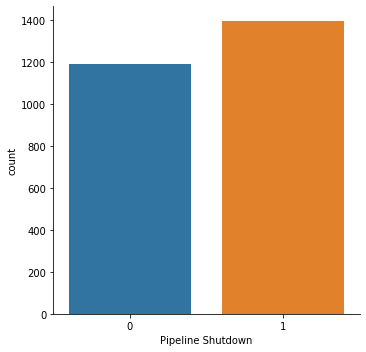

In [11]:
sb.catplot(x="Pipeline Shutdown", kind="count", data=data)

## Looks like there are about the same number of positive and negative cases

# Lets look at the variable 'Operator Name' in detail


In [12]:
data['Operator Name'].nunique()

225

# Lets look at the first 15 rows of 'Operator Name' and 'Operator ID' together because they are expected to be similar

In [13]:
data['Operator Name'].head(15)

0                    ONEOK NGL PIPELINE LP
4                    PLAINS PIPELINE, L.P.
5     ENBRIDGE ENERGY, LIMITED PARTNERSHIP
6      KINDER MORGAN LIQUID TERMINALS, LLC
9                           CONOCOPHILLIPS
10            TARGA RESOURCES OPERATING LP
11                  NUSTAR LOGISTICS, L.P.
12                    JAYHAWK PIPELINE LLC
13                          CONOCOPHILLIPS
14                  PLAINS MARKETING, L.P.
15                CCPS TRANSPORTATION, LLC
16         MAGELLAN AMMONIA PIPELINE, L.P.
17                SHELL PIPELINE CO., L.P.
18     KINDER MORGAN LIQUID TERMINALS, LLC
19             KOCH PIPELINE COMPANY, L.P.
Name: Operator Name, dtype: object

In [14]:
data['Operator ID'].head(15)

0     32109
4       300
5     11169
6     26041
9     31684
10    32296
11    31454
12     9175
13    31684
14    26085
15    32080
16    12105
17    31174
18    26041
19    22855
Name: Operator ID, dtype: int64

# Lets look at the number of unique counts to see if the Names match the ID

In [15]:
operator_uni = data['Operator Name'].value_counts()

op_idx = operator_uni.index

operator_uni = pd.DataFrame(data=operator_uni,dtype = object)
operator_uni_id = data['Operator ID'].value_counts()
operator_uni_id = pd.DataFrame(data=operator_uni_id,dtype = object)

operator_uni = operator_uni.reset_index(drop=True)
operator_uni_id = operator_uni_id.reset_index(drop=True)

combine_uni_count = pd.concat([operator_uni,operator_uni_id], axis=1,ignore_index=True)
combine_uni_count.set_index(op_idx,inplace=True)
combine_uni_count.columns = ['Operator Name','Operator ID']
combine_uni_count.head(15)

Operator Name Operator ID
SUNOCO PIPELINE L.P.                           177         182
ENTERPRISE CRUDE PIPELINE LLC                  176         177
PLAINS PIPELINE, L.P.                          155         155
ENTERPRISE PRODUCTS OPERATING LLC              148         148
COLONIAL PIPELINE CO                           121         121
MAGELLAN PIPELINE COMPANY, LP                  116         116
BUCKEYE PARTNERS, LP                           104         104
MARATHON PIPE LINE LLC                          84         101
KINDER MORGAN LIQUID TERMINALS, LLC             77          84
PHILLIPS 66 PIPELINE LLC                        75          77
ENBRIDGE ENERGY, LIMITED PARTNERSHIP            70          72
SHELL PIPELINE CO., L.P.                        58          70
EXXONMOBIL PIPELINE CO                          42          58
EXPLORER PIPELINE CO                            42          42
ONEOK NGL PIPELINE LP                           38          42

# It seems that both variables contain the same information and in order to avoid colinearity (which will affect the model), we should delete one of them from the data. The seperation from 'Operator Name' will probably be better as after some research, some companies have the same operator ID (probably it is unique to the parent company).

# Let's use 'Operator Name' and drop 'Operator ID.

In [16]:
data = data.drop(['Operator ID'], axis=1)

In [17]:
# Check how many null values there are
print("# null in Operator Name :",data['Operator Name'].isnull().sum())


# null in Operator Name : 0


# Good news, there are no null values in 'Operator Name' and we can skip filling in the step of filling in missing entries. Since there are 229 unique values, we cannot just convert each unique value to a corresponding numerical value to feed into the model. 

In [18]:
# Get mean number of incidents for each operator
operator_uni = data['Operator Name'].value_counts()
operator_uni = pd.DataFrame(data=operator_uni,dtype = object)
operator_mean = operator_uni['Operator Name'].mean()
print(operator_mean)

11.48


# The mean number of incidents was calculated and this could be used to classify all operators with lesser than the mean number of incidence as a single category.

In [19]:
# Get the names of all operator above or below the average
operator_uni_abv = operator_uni[(operator_uni['Operator Name']>operator_mean)]
operator_uni_blw = operator_uni[(operator_uni['Operator Name']<operator_mean)]
abv_list = list(operator_uni_abv.index.values)
blw_list = list(operator_uni_blw.index.values)

# Create empty dictionary
operator_map = {}

for i in range(len(abv_list)):
   
    entry = {abv_list[i]:i}
    operator_map.update(entry)

for j in range(len(blw_list)):
    
    entry = {blw_list[j]:len(abv_list)}
    operator_map.update(entry)
    
print(operator_map)

{'SUNOCO PIPELINE L.P.': 0, 'ENTERPRISE CRUDE PIPELINE LLC': 1, 'PLAINS PIPELINE, L.P.': 2, 'ENTERPRISE PRODUCTS OPERATING LLC': 3, 'COLONIAL PIPELINE CO': 4, 'MAGELLAN PIPELINE COMPANY, LP': 5, 'BUCKEYE PARTNERS, LP': 6, 'MARATHON PIPE LINE LLC': 7, 'KINDER MORGAN LIQUID TERMINALS, LLC': 8, 'PHILLIPS 66 PIPELINE LLC': 9, 'ENBRIDGE ENERGY, LIMITED PARTNERSHIP': 10, 'SHELL PIPELINE CO., L.P.': 11, 'EXXONMOBIL PIPELINE CO': 12, 'EXPLORER PIPELINE CO': 13, 'ONEOK NGL PIPELINE LP': 14, 'KOCH PIPELINE COMPANY, L.P.': 15, 'MAGELLAN AMMONIA PIPELINE, L.P.': 16, 'ONEOK NGL PIPELINE, LLC': 17, 'WYOMING PIPELINE COMPANY': 18, 'NUSTAR PIPELINE OPERATING PARTNERSHIP L.P.': 19, 'MID - VALLEY PIPELINE CO': 20, 'WEST TEXAS GULF PIPELINE CO': 21, 'JAYHAWK PIPELINE LLC': 22, 'CHEVRON PIPE LINE CO': 23, 'CONOCOPHILLIPS': 24, 'ROSE ROCK MIDSTREAM L.P.': 25, 'MAGELLAN TERMINALS HOLDINGS, LP': 26, 'HOLLY ENERGY PARTNERS - OPERATING, L.P.': 27, 'SFPP, LP': 28, 'PLANTATION PIPE LINE CO': 29, 'PLAINS MARKETIN

# Looks like now we have the dictionary to convert the 'Operator Name' column to a numerical column. Lets convert the column to numerical with our new interger encoding!


In [20]:
data['Operator Name'].head(10)

0                    ONEOK NGL PIPELINE LP
4                    PLAINS PIPELINE, L.P.
5     ENBRIDGE ENERGY, LIMITED PARTNERSHIP
6      KINDER MORGAN LIQUID TERMINALS, LLC
9                           CONOCOPHILLIPS
10            TARGA RESOURCES OPERATING LP
11                  NUSTAR LOGISTICS, L.P.
12                    JAYHAWK PIPELINE LLC
13                          CONOCOPHILLIPS
14                  PLAINS MARKETING, L.P.
Name: Operator Name, dtype: object

# Looks like the Operator Name column is now successfully converted! Lets see how well it correlates with 'Pipeline Shutdown'

In [21]:
data['Operator Name']=data['Operator Name'].map(operator_map).astype(int)
data['Operator Name'].head(10)

0     14
4      2
5     10
6      8
9     24
10    40
11    37
12    22
13    24
14    30
Name: Operator Name, dtype: int32

# Let's create a function to get a pivot table for each variable since we are going to do this for most categorical variables

In [22]:
def pivot_pipeline(variable):

    # get feature
    var = data[variable]

    # Create pivot table
    
    pivoted_table = pd.pivot_table(data=data,index=[var],values=['Pipeline Shutdown'],aggfunc=[np.mean,len])\
    .sort_values(by=[('mean', 'Pipeline Shutdown')],ascending=False, na_position='first')
    return pivoted_table 

# It appears that there is good seperation of pipeline shutdown for different 'Operator Name'

In [23]:
pivot_pipeline('Operator Name')

mean               len
              Pipeline Shutdown Pipeline Shutdown
Operator Name                                    
36                     0.923077                13
39                     0.833333                12
38                     0.833333                12
25                     0.833333                24
16                     0.764706                34
22                     0.758621                29
23                     0.740741                27
19                     0.733333                30
34                     0.714286                14
31                     0.705882                17
17                     0.705882                34
27                     0.681818                22
28                     0.650000                20
2                      0.645161               155
20                     0.586207                29
40                     0.585321               545
37                     0.583333                12
24                     0.576923                26
3                      0.560811               148
8                      0.545455                77
10                     0.528571                70
4                      0.520661               121
15                     0.514286                35
7                      0.500000                84
14                     0.500000                38
29                     0.500000                20
12                     0.500000                42
9                      0.493333                75
1                      0.488636               176
5                      0.465517               116
0                      0.451977               177
11                     0.448276                58
6                      0.432692               104
33                     0.428571                14
21                     0.413793                29
13                     0.380952                42
26                     0.347826                23
30                     0.315789                19
32                     0.200000                15
18                     0.156250                32
35                     0.153846                13

# Define a function to change the index according to %pipeline Shutdown

In [24]:

def pivot_reorder(var):

    pivot_order = pivot_pipeline(var).index.values
    length_list = len(pivot_order)
    array_order = range(0,length_list)

    output_map = {}

    for i in range(length_list):

        dict_entry = {pivot_order[i]:array_order[i]}
        output_map.update(dict_entry)
        
    return data[var].map(output_map)


In [25]:
data['Operator Name'] = pivot_reorder('Operator Name')

pivot_pipeline('Operator Name')

mean               len
              Pipeline Shutdown Pipeline Shutdown
Operator Name                                    
0                      0.923077                13
1                      0.833333                12
2                      0.833333                12
3                      0.833333                24
4                      0.764706                34
5                      0.758621                29
6                      0.740741                27
7                      0.733333                30
8                      0.714286                14
10                     0.705882                34
9                      0.705882                17
11                     0.681818                22
12                     0.650000                20
13                     0.645161               155
14                     0.586207                29
15                     0.585321               545
16                     0.583333                12
17                     0.576923                26
18                     0.560811               148
19                     0.545455                77
20                     0.528571                70
21                     0.520661               121
22                     0.514286                35
23                     0.500000                84
24                     0.500000                38
25                     0.500000                20
26                     0.500000                42
27                     0.493333                75
28                     0.488636               176
29                     0.465517               116
30                     0.451977               177
31                     0.448276                58
32                     0.432692               104
33                     0.428571                14
34                     0.413793                29
35                     0.380952                42
36                     0.347826                23
37                     0.315789                19
38                     0.200000                15
39                     0.156250                32
40                     0.153846                13

# Now lets look at the 'Pipeline/Facility Name' variable

In [26]:
data['Pipeline/Facility Name'].nunique()

1871

# We have 1977 unique values, when converted to numerical this column will almost provide no information to the model! Maybe we can engineer a new variable out of 'Pipeline/Facility'?

In [27]:
print(data['Pipeline/Facility Name'][0:30])

0                                     KINDER MORGAN JCT
4                                        RED RIVER EAST
5                                                   NaN
6                                                   NaN
9                                             TANK 1501
10                             N-4 LINE (NORMAL BUTANE)
11                 46P HOUSTON 12" REFINDED PRODUCTS PL
12                                   CHASE KAW TERMINAL
13                                             TANK 824
14                                     CUSHING TERMINAL
15                    CCPS TRANSPORTATION, RUSH STATION
16                        MAGELLAN AMMONIA PIPELINE, LP
17                                        SORRENTO DOME
18                                                  NaN
19                             PARK RAPIDS PUMP STATION
20                              GOWANDA BOOSTER STATION
21    LINE 63 SOUTH PACIFIC PIPELINES BP REFINERY TA...
22                                              

# On close inspection, some entries have similar keywords in 'Pipeline/Facility Name' which are: (1)Terminal, (2) Tank ,(3) Farm ,(4) Junction , and (5) Word equivalent to pumping(Pump Station, Pumping Station, Booster Station,etc)

## Keyword extractor function obtain from: https://codereview.stackexchange.com/questions/249329/finding-the-most-frequent-words-in-pandas-dataframe


In [28]:
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

stop_words = stopwords.words()

def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)     

    # removing the emojies               # https://www.kaggle.com/alankritamishra/covid-19-tweet-sentiment-analysis#Sentiment-analysis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)   
    
    # removing the stop-words          
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence
    
    return text

dt = data['Pipeline/Facility Name'].dropna().apply(cleaning)

from collections import Counter
p = Counter(" ".join(dt).split()).most_common(15)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\San\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\San\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


        Word  Frequency
0    station        855
1   terminal        316
2   pipeline        199
3       pump        196
4       line        164
5       tank        129
6       farm        109
7   junction         81
8       city         78
9       west         67
10   cushing         62
11      east         58
12    system         57
13     crude         56
14     north         48


# After some research, it appears that some keywords are actually the main types of pipeline facility, lets try to use RegEx to extract this information!
https://en.wikipedia.org/wiki/Pipeline_transport

In [29]:
data['Pipeline/Facility Name'] = data['Pipeline/Facility Name'].dropna().apply(cleaning)

pattern = re.compile(r'(terminal|tank|farm|junction|pump|pumping|booster|line|pipeline)',re.IGNORECASE)

data['Facility Type'] = data['Pipeline/Facility Name'].str.extract(pat = pattern,expand=False)
data['Facility Type'][0:15]


0          NaN
4          NaN
5          NaN
6          NaN
9         tank
10        line
11         NaN
12    terminal
13        tank
14    terminal
15         NaN
16    pipeline
17         NaN
18         NaN
19        pump
Name: Facility Type, dtype: object

# Lets convert the created variable 'Facility Type' into numerical. After some research, it was determined that 'tank' and 'farm' both refer to a type of storage facility. Also, 'pump', 'pumping', and 'booster' all refer to the same type of transport facility.

In [30]:
facility_map = {"terminal":1,"junction":2,"tank":3,"farm":3,"pump":4,"pumping":4,"booster":4,"line":5,"pipeline":5} 

data['Facility Type'] = data['Facility Type'].map(facility_map)
data['Facility Type'] = data['Facility Type'].fillna(0).astype(int)
data['Facility Type'][0:15]

0     0
4     0
5     0
6     0
9     3
10    5
11    0
12    1
13    3
14    1
15    0
16    5
17    0
18    0
19    4
Name: Facility Type, dtype: int32

# Lets see if this new created variable can seperate 'Pipeline Shutdown' well. 

# It appears that it indeed is correlated with pipeline shutdown, with facility type "Farm/Tank" (type 3) having the lowest proportion of shudowns and "Pipe/Pipeline" having the lowest proportion of shutdowns

In [31]:
pivot_pipeline_table = pivot_pipeline('Facility Type')
facility_index = pd.Series(['Pipe/Pipeline','No keyword','pump/pumping','junction','terminal','tank/farm'])  
pivot_pipeline_table.set_index(facility_index)

mean               len
              Pipeline Shutdown Pipeline Shutdown
Pipe/Pipeline          0.677749               391
No keyword             0.562372              1467
pump/pumping           0.549020               204
junction               0.493827                81
terminal               0.368932               309
tank/farm              0.297710               131

# Reorder the column 'Facility type'

In [32]:
data['Facility Type'] = pivot_reorder('Facility Type')

pivot_pipeline('Facility Type')

mean               len
              Pipeline Shutdown Pipeline Shutdown
Facility Type                                    
0                      0.677749               391
1                      0.562372              1467
2                      0.549020               204
3                      0.493827                81
4                      0.368932               309
5                      0.297710               131

# Let's drop the column 'Pipeline/Facility Name'

In [33]:
data = data.drop(['Pipeline/Facility Name'],axis=1)

# Now let us look at 'Report Number' and 'Supplemental number' to see if we can extract anything useful from them

In [34]:
data[['Report Number', 'Supplemental Number']] = data[['Report Number', 'Supplemental Number']].astype(str)

In [35]:
data[['Report Number', 'Supplemental Number']].describe(include=object)

Report Number Supplemental Number
count           2583                2583
unique          2583                2583
top         20160186               17846
freq               1                   1

In [36]:
data[['Report Number', 'Supplemental Number']].head(10)

Report Number Supplemental Number
0       20100016               17305
4       20100030               16276
5       20100021               17161
6       20110036               18052
9       20100024               18390
10      20100150               15205
11      20100262               15399
12      20100234               18134
13      20100026               17874
14      20100106               17751

# It does not look like both of the columns contain any information with predictive power since there are no same values in these columns. Therefore lets drop the columns.

In [37]:
data = data.drop(['Report Number', 'Supplemental Number'], axis=1)


# Now let us move on to 'Pipeline Location' and 'Pipeline Type'

In [38]:
data[['Pipeline Location', 'Pipeline Type']].describe(include=object)

Pipeline Location Pipeline Type
count               2583          2566
unique                 2             4
top              ONSHORE   ABOVEGROUND
freq                2566          1337

# There are 18 null values in 'Pipeline Type', we will have to deal with the missing data later

In [39]:

print("# null in Pipeline Location :",data['Pipeline Location'].isnull().sum())
print("# null in Pipeline Type :",data['Pipeline Type'].isnull().sum())

# null in Pipeline Location : 0
# null in Pipeline Type : 17


In [40]:
data['Pipeline Location'].value_counts()

ONSHORE     2566
OFFSHORE      17
Name: Pipeline Location, dtype: int64

In [41]:
data['Pipeline Type'].value_counts()

ABOVEGROUND        1337
UNDERGROUND         930
TANK                285
TRANSITION AREA      14
Name: Pipeline Type, dtype: int64

# Lets fill in the null values in 'Pipeline Type' with the mode value (ABOVEGROUND)

In [42]:
data['Pipeline Type'] = data['Pipeline Type'].fillna('ABOVEGROUND')

In [43]:
temp = data[data['Pipeline Location']=='OFFSHORE']


# The seperation for both variables look alright, we could just use it directly

In [44]:
pivot_pipeline('Pipeline Location')

mean               len
                  Pipeline Shutdown Pipeline Shutdown
Pipeline Location                                    
OFFSHORE                   0.647059                17
ONSHORE                    0.539361              2566

In [45]:
pivot_pipeline('Pipeline Type')

mean               len
                Pipeline Shutdown Pipeline Shutdown
Pipeline Type                                      
UNDERGROUND              0.664516               930
ABOVEGROUND              0.522157              1354
TRANSITION AREA          0.500000                14
TANK                     0.221053               285

# It appears that both variables have very few unique values, lets just convert each to a numerical format

In [46]:
loc_map = {'OFFSHORE':0,'ONSHORE':1}
type_map = {'TRANSITION AREA':2,'TANK':3,'UNDERGROUND':0,'ABOVEGROUND':1}

data['Pipeline Location'] = data['Pipeline Location'].map(loc_map).astype(int)
data['Pipeline Type'] = data['Pipeline Type'].map(type_map).astype(int)
data.head()

Accident Year Accident Date/Time  Operator Name  Pipeline Location  \
0           2010   1/1/2010 7:15 AM             24                  1   
4           2010   1/7/2010 1:00 PM             13                  1   
5           2010  1/8/2010 11:38 PM             20                  1   
6           2010  1/9/2010 12:15 AM             19                  1   
9           2010  1/11/2010 2:30 PM             17                  1   

   Pipeline Type                                        Liquid Type  \
0              1         HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS   
4              0                                          CRUDE OIL   
5              0                                          CRUDE OIL   
6              3  REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...   
9              3  REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...   

                                      Liquid Subtype Liquid Name  \
0  LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...         NaN   
4                                                NaN         NaN   
5                                                NaN         NaN   
6                             GASOLINE (NON-ETHANOL)         NaN   
9                             GASOLINE (NON-ETHANOL)         NaN   

  Accident City Accident County  ... Public Fatalities  All Fatalities  \
0     MCPHERSON       MCPHERSON  ...               NaN             NaN   
4       SHERMAN         GRAYSON  ...               NaN             NaN   
5         NECHE         PEMBINA  ...               NaN             NaN   
6   GALENA PARK          HARRIS  ...               NaN             NaN   
9      PASADENA          HARRIS  ...               NaN             NaN   

   Property Damage Costs Lost Commodity Costs  \
0                  110.0               1517.0   
4                20000.0                150.0   
5                76940.0             167775.0   
6                    0.0                400.0   
9                    0.0                 50.0   

  Public/Private Property Damage Costs  Emergency Response Costs  \
0                                  0.0                       0.0   
4                                  0.0                    7500.0   
5                             150000.0                 1800000.0   
6                                  0.0                       0.0   
9                                  0.0                   10000.0   

   Environmental Remediation Costs  Other Costs  All Costs Facility Type  
0                              0.0          0.0       1627             1  
4                           2000.0          0.0      29650             1  
5                        2000000.0          0.0    4194715             1  
6                          70000.0          0.0      70400             1  
9                          10000.0      10000.0      30050             5  

[5 rows x 45 columns]

# Let's look at the encoded columns

In [47]:
pivot_pipeline('Pipeline Location')

mean               len
                  Pipeline Shutdown Pipeline Shutdown
Pipeline Location                                    
0                          0.647059                17
1                          0.539361              2566

In [48]:
pivot_pipeline('Pipeline Type')

mean               len
              Pipeline Shutdown Pipeline Shutdown
Pipeline Type                                    
0                      0.664516               930
1                      0.522157              1354
2                      0.500000                14
3                      0.221053               285

# Now we move on to 'Liquid Type', 'Liquid Subtype', 'Liquid Name'

# Because we know that 'Liquid Subtype' is a subcategory of 'Liquid Type' and that 'Liquid Name' is a subcategory of 'Liquid subtype' , it might create colinearity if we use them. Lets use the dython library's Theil U function to look at the correlation between these categorical variables.

C:\Users\San\anaconda3\lib\site-packages\pandas\core\frame.py:4465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


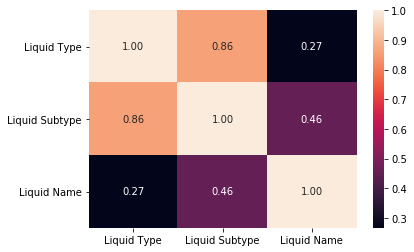

In [49]:
#import dython for theil U correlation

from dython import nominal
#Heat map to see correlation between categorical variables
nominal.associations(data[['Liquid Type', 'Liquid Subtype', 'Liquid Name']], nominal_columns='all')
#Note that operator,pipeline type,cause subcategory have significant correlation

# NOTE: It appears that 'Liquid Type' and 'Liquid Subtype' are highly correlated, we might have to drop one of them to make sure that the model trained on the data will owrk properly!

In [50]:
data[['Liquid Type', 'Liquid Subtype', 'Liquid Name']].describe(include=object)

Liquid Type                        Liquid Subtype Liquid Name
count         2583                                  1229         205
unique           5                                     8          65
top      CRUDE OIL  DIESEL, FUEL OIL, KEROSENE, JET FUEL     PROPANE
freq          1310                                   366          25

# 'Liquid Type' and 'Liquid Subtype' look easier to deal with, we will deal with them first

In [51]:

print("# null in Liquid Type :",data['Liquid Type'].isnull().sum())
print("# null in Liquid Subtype :",data['Liquid Subtype'].isnull().sum())

# null in Liquid Type : 0
# null in Liquid Subtype : 1354


# Because there are so many empty entries, we are not able to somehow fill the null values with mode or do something similar.

# It appears that there are no repeats/typos and we can proceed with processing the data

In [52]:
data['Liquid Type'].value_counts()

CRUDE OIL                                               1310
REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID       845
HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS               390
CO2 (CARBON DIOXIDE)                                      36
BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)       2
Name: Liquid Type, dtype: int64

In [53]:
data['Liquid Subtype'].value_counts()

DIESEL, FUEL OIL, KEROSENE, JET FUEL                        366
GASOLINE (NON-ETHANOL)                                      336
LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL GAS LIQUID)    178
OTHER HVL                                                   158
MIXTURE OF REFINED PRODUCTS (TRANSMIX OR OTHER MIXTURE)      91
ANHYDROUS AMMONIA                                            51
OTHER                                                        47
BIODIESEL                                                     2
Name: Liquid Subtype, dtype: int64

# Separation is not great for 'Liquid Type' but very good for 'Liquid Subtype'

In [54]:
pivot_pipeline('Liquid Type')

mean  \
                                                   Pipeline Shutdown   
Liquid Type                                                            
HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS                  0.638462   
CO2 (CARBON DIOXIDE)                                        0.555556   
CRUDE OIL                                                   0.537405   
REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID          0.499408   
BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BL...          0.000000   

                                                                 len  
                                                   Pipeline Shutdown  
Liquid Type                                                           
HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS                       390  
CO2 (CARBON DIOXIDE)                                              36  
CRUDE OIL                                                       1310  
REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID               845  
BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BL...                 2

In [55]:
pivot_pipeline('Liquid Subtype')

mean  \
                                                   Pipeline Shutdown   
Liquid Subtype                                                         
ANHYDROUS AMMONIA                                           0.725490   
LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL GA...          0.646067   
OTHER HVL                                                   0.607595   
GASOLINE (NON-ETHANOL)                                      0.565476   
OTHER                                                       0.553191   
DIESEL, FUEL OIL, KEROSENE, JET FUEL                        0.475410   
MIXTURE OF REFINED PRODUCTS (TRANSMIX OR OTHER ...          0.307692   
BIODIESEL                                                   0.000000   

                                                                 len  
                                                   Pipeline Shutdown  
Liquid Subtype                                                        
ANHYDROUS AMMONIA                                                 51  
LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL GA...               178  
OTHER HVL                                                        158  
GASOLINE (NON-ETHANOL)                                           336  
OTHER                                                             47  
DIESEL, FUEL OIL, KEROSENE, JET FUEL                             366  
MIXTURE OF REFINED PRODUCTS (TRANSMIX OR OTHER ...                91  
BIODIESEL                                                          2

# Now we convert all the categorical variable names to numerical

In [56]:
liq_type_map = {'HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS':4,\
                 'CO2 (CARBON DIOXIDE)':3,\
                 'CRUDE OIL':2,\
                 'REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID':1,\
                 'BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)':0}

liq_subtype_map = {'ANHYDROUS AMMONIA':8,\
                     'LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL GAS LIQUID)':7,\
                     'OTHER HVL':6,\
                     'GASOLINE (NON-ETHANOL)':5,\
                     'OTHER':4,\
                     'DIESEL, FUEL OIL, KEROSENE, JET FUEL':3,\
                     'MIXTURE OF REFINED PRODUCTS (TRANSMIX OR OTHER MIXTURE)':2,\
                     'BIODIESEL':1,\
                      0:0}


In [57]:
data['Liquid Type'] = data['Liquid Type'].map(liq_type_map).astype(int)
data['Liquid Subtype'] = data['Liquid Subtype'].fillna(0) # Use .fillna() to remove null values first
data['Liquid Subtype'] = data['Liquid Subtype'].map(liq_subtype_map).astype(int)
data[['Liquid Type','Liquid Subtype']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2583 entries, 0 to 2794
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Liquid Type     2583 non-null   int32
 1   Liquid Subtype  2583 non-null   int32
dtypes: int32(2)
memory usage: 104.9 KB


# Now both 'Liquid Type' and 'Liquid Subtype' look about right!

In [58]:
data[['Liquid Type','Liquid Subtype']].head(10)

Liquid Type  Liquid Subtype
0             4               7
4             2               0
5             2               0
6             1               5
9             1               5
10            4               6
11            1               3
12            2               0
13            2               0
14            2               0

# Now lets reorder everything

In [59]:
data['Liquid Type'] = pivot_reorder('Liquid Type')

pivot_pipeline('Liquid Type')

mean               len
            Pipeline Shutdown Pipeline Shutdown
Liquid Type                                    
0                    0.638462               390
1                    0.555556                36
2                    0.537405              1310
3                    0.499408               845
4                    0.000000                 2

In [60]:
data['Liquid Subtype'] = pivot_reorder('Liquid Subtype')

pivot_pipeline('Liquid Subtype')

mean               len
               Pipeline Shutdown Pipeline Shutdown
Liquid Subtype                                    
0                       0.725490                51
1                       0.646067               178
2                       0.607595               158
3                       0.565476               336
4                       0.553191                47
5                       0.538405              1354
6                       0.475410               366
7                       0.307692                91
8                       0.000000                 2

# Now back to 'Liquid Name'. Hmmm....there are only 222 rows with entries

In [61]:
data['Liquid Name'].notnull().sum()

205

# It appears that there are 69 unique values with the most common value being some sort of short-chain hydrocarbon. Although all of these values contain some sort of information of how dangerous all theses substances are, this information is already reflected in 'Liquid Type' and 'Liquid Subtype'. 

# Also, because there are so many empty values we simply have to drop this variable. 

In [62]:
data['Liquid Name'].value_counts()
data = data.drop(['Liquid Name'],axis=1)

# Now let's move onto the spacial data, namely 'Accident City', 'Accident County', 'Accident State', 'Accident Latitude', and 'Accident Longitude'.


In [63]:
data[['Accident City', 'Accident County', 'Accident State', 'Accident Latitude','Accident Longitude']].describe(include='object')

Accident City Accident County Accident State
count           2294            2535           2572
unique           983             655             45
top          CUSHING          HARRIS             TX
freq              68             156            938

# Firstly, the 'Accident Latitude', and 'Accident Longitude'. Although these values are continuous, they are probably not gonna give us much insight since there is probably no simple relationship between them and whether a pipeline shuts down or not. Perhaps, clustering them into regions might be more meaningful as different regions may react to accidents differently.


# Lets see if there are any empty rows first

In [64]:
print("# null in Latitute :",data['Accident Latitude'].isnull().sum())
print("# null in Longitude :",data['Accident Longitude'].isnull().sum())

# null in Latitute : 0
# null in Longitude : 0


# Great we have all the coordinates! Now let's do some clustering with K-means 
(code adapted from https://levelup.gitconnected.com/clustering-gps-co-ordinates-forming-regions-4f50caa7e4a1)

# Before starting, let's visualize the data points

In [65]:
import plotly.graph_objects as go

import pandas as pd

fig = go.Figure(data=go.Scattergeo(
        lon = data['Accident Longitude'],
        lat = data['Accident Latitude'],
        mode = 'markers',
        #marker_color = df['cnt'],
        ))

fig.update_layout(
        title = 'Map of all pipeline incidents, 2010-2017',
        geo_scope='usa',
    )
fig.show()

# When plotted on a scatter graph, some outliers can be seen. They have to be removed as they will affect the K-means as they distort the error term greatly

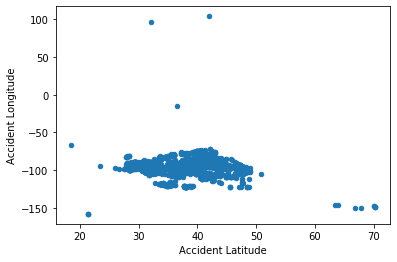

In [66]:
data.plot.scatter(x = 'Accident Latitude', y = 'Accident Longitude')

# We will remove all outliers manually since writting an algorithm to do it takes alot of time!

In [67]:
 data.loc[(data['Accident Latitude']<25) | (data['Accident Latitude']>60) | (data['Accident Longitude']>-50) ,['Accident Latitude','Accident Longitude']]

Accident Latitude  Accident Longitude
133           63.930740         -145.766610
357           70.256660         -148.620300
377           18.448010          -66.074760
818           70.151205         -147.096536
1274          67.798700         -149.816400
1502          32.064170           96.866140
1533          21.316680         -158.099930
1755          41.890476          104.263399
1779          70.261265         -148.611844
1945          21.317740         -157.890550
2058          70.257147         -148.621973
2116          63.425460         -145.766500
2193          36.560830          -14.355830
2244          23.336784          -94.958220
2420          70.107620         -147.386330
2506          66.812823         -150.662681
2613          21.304380         -158.093700

# Let's create a column that describe whether each entry is an outlier or not (outlier = 1, normal =0). Note that there are 17 outliers.


In [68]:
data['Outlier'] = (data['Accident Latitude']<25) | (data['Accident Latitude']>60) | (data['Accident Longitude']>-50)
data['Outlier'].sum()

17

# Let's plot the scatter plot again with the outliers in a different colour to check if the outliers were labled correctly

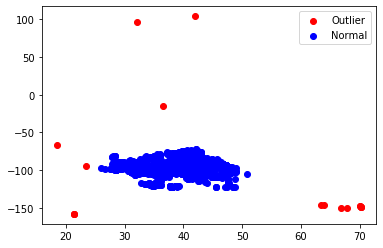

In [69]:
fig = plot.figure()
ax1 = fig.add_subplot(111)

X1 = data.loc[data['Outlier']==1,['Accident Latitude']]
X2 = data.loc[data['Outlier']==0,['Accident Latitude']]

Y1 = data.loc[data['Outlier']==1,['Accident Longitude']]
Y2 = data.loc[data['Outlier']==0,['Accident Longitude']]


ax1.scatter(X1, Y1,c='Red',label='Outlier')
ax1.scatter(X2, Y2,c='Blue',label='Normal')
plot.legend(loc='upper right');
plot.show()



# Seems like we successfully identified the outliers, lets create a data set with no outliers

In [70]:
data_no_outlier = data[data['Outlier']==0]
data_no_outlier['Outlier'].value_counts()

False    2566
Name: Outlier, dtype: int64

In [71]:
 data.loc[data['Accident Latitude']<25,['Accident Latitude']]

Accident Latitude
377           18.448010
1533          21.316680
1945          21.317740
2244          23.336784
2613          21.304380

# Based on the elbow curve, it seems like k=3 or k=4 would give the best clustering

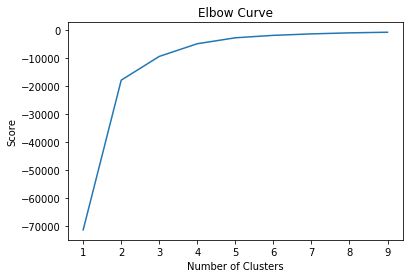

In [72]:
from sklearn.cluster import KMeans

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = data_no_outlier[['Accident Latitude']]
X_axis = data_no_outlier[['Accident Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plot.plot(K_clusters, score)
plot.xlabel('Number of Clusters')
plot.ylabel('Score')
plot.title('Elbow Curve')
plot.show()

In [73]:
# Now let's do the clustering and add the outliers back to the data frame afterwards

In [74]:
# Set number of clusters here

num_clus = 4
kmeans = KMeans(n_clusters = num_clus, init ='k-means++')
kmeans.fit(data_no_outlier[['Accident Latitude','Accident Longitude']]) # Compute k-means clustering.
data_no_outlier['cluster label'] = kmeans.fit_predict(data_no_outlier[['Accident Latitude','Accident Longitude']])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
#labels = kmeans.predict(data_no_outlier[['Accident Latitude','Accident Longitude']]) # Labels of each point

cluster_label = pd.DataFrame(data_no_outlier['cluster label'])

# Use outer join such that outliers will have 'NaN' in the new data frame
data = pd.concat([data, cluster_label], axis=1)
# print out number of null values in 'cluster label' in the new data frame - it should be 17 as we had 17 outliers
print('# of outliers in new data frame:\t',data['cluster label'].isnull().sum())

# This will be the label for outliers
null_number = num_clus+1

data['cluster label'] = data['cluster label'].fillna(null_number)

data['cluster label'] = data['cluster label'].astype(int)

pivot_by_cluster = pivot_pipeline('cluster label')

as_list = pivot_by_cluster.index.tolist()
idx = as_list.index(null_number)
as_list[idx] = 'outlier'
pivot_by_cluster.index = as_list

# of outliers in new data frame:	 17


C:\Users\San\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Looks like there is some seperation, but its not great

In [75]:
pivot_by_cluster

mean               len
        Pipeline Shutdown Pipeline Shutdown
outlier          0.647059                17
3                0.600000               190
0                0.587738               473
1                0.526278              1389
2                0.507782               514

# Let's reorder everything

In [76]:
data['cluster label'] = pivot_reorder('cluster label')

pivot_pipeline('cluster label')

mean               len
              Pipeline Shutdown Pipeline Shutdown
cluster label                                    
0                      0.647059                17
1                      0.600000               190
2                      0.587738               473
3                      0.526278              1389
4                      0.507782               514

In [77]:
labels = data[['cluster label']].to_numpy()

# transpose and extract 1st and only element
labels = labels.transpose()[0]

# Let's visualize the clustering

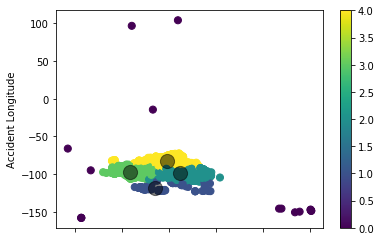

In [78]:
data.plot.scatter(x = 'Accident Latitude', y = 'Accident Longitude', c=labels, s=50, cmap='viridis')
plot.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [79]:
fig = go.Figure(data=go.Scattergeo(
        lon = data['Accident Longitude'],
        lat = data['Accident Latitude'],
        mode = 'markers',
        marker_color = data['cluster label'],
        ))

fig.update_layout(
        title = 'Map of all pipeline incidents, 2010-2017',
        geo_scope='usa',
    )
fig.show()

# Lastly, we will drop the 'Outlier' column as we will not use it anymore

In [80]:
data = data.drop('Outlier',axis=1)

# Now let's turn our attention to 'Accident State','Accident County', and 'Accident City'

# The data for 'Accident State' is quite complete where as there are quite a few empty values of Accident Country and City.

In [81]:
print("# null in City :",data['Accident City'].isnull().sum())
print("# null in County :",data['Accident County'].isnull().sum())
print("# null in State :",data['Accident State'].isnull().sum())

# null in City : 289
# null in County : 48
# null in State : 11


# Tried to see if we can find out the missing state data by looking at their 'Accident City' or 'Accident County' location, but they are empty too.

In [82]:
data.loc[data['Accident State'].isnull(),['Accident City', 'Accident County']]

Accident City Accident County
53             NaN             NaN
75             NaN             NaN
174            NaN             NaN
233            NaN             NaN
503            NaN             NaN
594            NaN             NaN
1665           NaN             NaN
1733           NaN             NaN
2039           NaN             NaN
2267           NaN             NaN
2340           NaN             NaN

# We will try to visualize where these rows without 'Accident State'. From the map, it seems like the incidents happened in the Gulf of Mexico. Now we know why the 'Accident State' location was unavailable. 

In [83]:
missing_state = data.loc[data['Accident State'].isnull()]                                         

fig = go.Figure(data=go.Scattergeo(
        lon = missing_state['Accident Longitude'],
        lat = missing_state['Accident Latitude'],
        mode = 'markers',
        #marker_color = df['cnt'],
        ))

fig.update_layout(
        title = 'Incidents without state information',
        geo_scope='usa',
    )
fig.show()

# Let us label the 'Stateless' Incidents as 'Gulf of Mexico' (GOM)

In [84]:
data['Accident State'] = data['Accident State'].fillna('GOM')                                  

data.loc[data['Accident State']=='GOM',['Accident State']]

Accident State
53              GOM
75              GOM
174             GOM
233             GOM
503             GOM
594             GOM
1665            GOM
1733            GOM
2039            GOM
2267            GOM
2340            GOM

# Let's do the same for 'Accident County'

In [85]:
missing_county = data.loc[data['Accident County'].isnull()]                                         

fig = go.Figure(data=go.Scattergeo(
        lon = missing_county['Accident Longitude'],
        lat = missing_county['Accident Latitude'],
        mode = 'markers',
        #marker_color = df['cnt'],
        ))

fig.update_layout(
        title = 'Incidents without county information',
        geo_scope='usa',
    )
fig.show()

# We can see that some points are the 'Gulf of Mexico' points from before, lets set the County information for those to 'GOM' too

In [86]:

data.loc[((data['Accident County'].isnull()) & (data['Accident State']=='GOM')),['Accident County']] = 'GOM'

data.loc[(data['Accident State']=='GOM'),['Accident State','Accident County']]

Accident State Accident County
53              GOM             GOM
75              GOM             GOM
174             GOM             GOM
233             GOM             GOM
503             GOM             GOM
594             GOM             GOM
1665            GOM             GOM
1733            GOM             GOM
2039            GOM             GOM
2267            GOM             GOM
2340            GOM             GOM

In [87]:
missing_county = data.loc[data['Accident County'].isnull()]                                         

fig = go.Figure(data=go.Scattergeo(
        lon = missing_county['Accident Longitude'],
        lat = missing_county['Accident Latitude'],
        mode = 'markers',
        #marker_color = df['cnt'],
        ))

fig.update_layout(
        title = 'Incidents without county information',
        geo_scope='usa',
    )
fig.show()

# For the missing City information, we will just drop it as there are 983 unique values - meaning it will have almost no predictive power.

In [88]:
data['Accident City'].describe()
data = data.drop(['Accident City'],axis=1)

# Let us try something more sophisticated to get all the 'Accident County' information from the coordinates of the incidents - let's use a technique called 'Reverse Geocoding' 

## Code adapted from: 
https://towardsdatascience.com/reverse-geocoding-in-python-a915acf29eb6

## Note: There are only a few rows without county information (30~ rows) but I wanted to learn how to do Reverse Geoencoding as I find it fascinating lol

In [89]:
missing_data = data.loc[data['Accident County'].isnull(),['Accident Latitude','Accident Longitude']]

In [90]:
# %load_ext autotime
import pandas as pd
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
import plotly_express as px
import tqdm
from tqdm._tqdm_notebook import tqdm_notebook

C:\Users\San\anaconda3\lib\site-packages\ipykernel_launcher.py:10: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`



# Setting up and deploying the reverse geocoder and printing out the address obtained. 
## (This section is commented out as it takes a long time to run. I saved the result that the following cell outputs normally.)

In [91]:
'''
locator = Nominatim(user_agent="myGeocoder", timeout=10) # set timeout so that we wouldnt get timeout error
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)

missing_data['geom'] = missing_data['Accident Latitude'].map(str) + ','+ missing_data['Accident Longitude'].map(str)

tqdm_notebook.pandas()
missing_data['address'] = missing_data['geom'].progress_apply(rgeocode)
'''



'\nlocator = Nominatim(user_agent="myGeocoder", timeout=10) # set timeout so that we wouldnt get timeout error\nrgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)\n\nmissing_data[\'geom\'] = missing_data[\'Accident Latitude\'].map(str) + \',\'+ missing_data[\'Accident Longitude\'].map(str)\n\ntqdm_notebook.pandas()\nmissing_data[\'address\'] = missing_data[\'geom\'].progress_apply(rgeocode)\n'

# This loads the data from the Reverse Geoencoding

In [92]:

address_data = {'address':['Phillips, Hutchinson County, Texas, United States',
 'Pump Station 9, Unorganized Borough, Alaska, United States',
 'Phillips Co Private Road, Pasadena, Harris County, Texas, 77506, United States',
 'South Street, Fort Laramie, Goshen County, Wyoming, 82212, United States',
 'Dicks Road, Webre Steib Plantation, St. James Parish, Louisiana, 70090, United States',
 'Andrews County, Texas, 79714, United States',
 '1331, North Witter Street, Houston, Harris County, Texas, 77506, United States',
 'Columbia Drive, Bedford Park, Lyons Township, Cook County, Illinois, 60501, United States',
 'Harris County, Texas, United States',
 'Taft, Kern County, California, United States',
 'Seig Road, Golden Valley County, Montana, United States',
 'North Slope, Alaska, United States',
 'Plaquemines Parish, Louisiana, United States',
 '713, Calle José Ramón Figueroa Villamil, Colectora, Santurce, San Juan, Puerto Rico, 00907, United States',
 'Smith Road, Aurora, Adams County, Colorado, 80011, United States',
 'Payne County, Oklahoma, 74023, United States',
 '20454, 135th Street, Romeoville, Will County, Illinois, 60446, United States',
 'FM 517, Bayou Lakes, Dickinson, Galveston County, Texas, 77512, United States',
 'N2950 Road, Kingfisher County, Oklahoma, United States',
 '649, Harbor Plaza, Long Beach, Los Angeles County, California, 90802, United States',
 'Perth Amboy, Middlesex County, New Jersey, 10307, United States',
 'Holabird Avenue, Baltimore, Maryland, 21224, United States',
 '9345, Bennington Road, Omaha, Douglas County, Nebraska, 68122, United States',
 'Middletown Lincroft Road, Lincroft, Middletown Township, Monmouth County, New Jersey, 07748, United States',
 'Grace Funeral Home, 2401, Houston Highway, Victoria, Victoria County, Texas, 77901, United States',
 'Plaquemines Parish, Louisiana, United States',
 'Tank Farm Road, Platte County, Wyoming, United States',
 'Connecticut Avenue, Annex, New Haven, New Haven County, Connecticut, 06513-4223, United States',
 'Buckeye Road, Upper Milford Township, Lehigh County, Pennsylvania, 18062, United States',
 'Dalton Highway, North Slope, Alaska, United States',
 "Devil's Canyon Road, Wadstrom, Ventura County, California, 93001, United States",
 'Raleigh Oil Field Road, Smith County, Mississippi, United States',
 '2569, TX 72, Live Oak County, Texas, 78071, United States',
 'N2575 Road, Watonga, Blaine County, Oklahoma, 73772, United States',
 'Payne County, Oklahoma, 74023, United States',
 'BLM, US 212, Hammond, Carter County, Montana, United States',
 'Plaquemines Parish, Louisiana, United States']} 

missing_data['address'] = pd.DataFrame(address_data, index=\
[76,
 133,
 139,
 158,
 164,
 208,
 210,
 277,
 278,
 298,
 299,
 357,
 375,
 377,
 410,
 426,
 479,
 540,
 548,
 587,
 742,
 743,
 764,
 814,
 885,
 944,
 971,
 1196,
 1210,
 1274,
 1390,
 1392,
 1571,
 1643,
 1705,
 1785,
 2349])

print(missing_data['address'])
for x in missing_data['address']:
    print(x)
    

76      Phillips, Hutchinson County, Texas, United States
133     Pump Station 9, Unorganized Borough, Alaska, U...
139     Phillips Co Private Road, Pasadena, Harris Cou...
158     South Street, Fort Laramie, Goshen County, Wyo...
164     Dicks Road, Webre Steib Plantation, St. James ...
208           Andrews County, Texas, 79714, United States
210     1331, North Witter Street, Houston, Harris Cou...
277     Columbia Drive, Bedford Park, Lyons Township, ...
278                   Harris County, Texas, United States
298          Taft, Kern County, California, United States
299     Seig Road, Golden Valley County, Montana, Unit...
357                    North Slope, Alaska, United States
375          Plaquemines Parish, Louisiana, United States
377     713, Calle José Ramón Figueroa Villamil, Colec...
410     Smith Road, Aurora, Adams County, Colorado, 80...
426          Payne County, Oklahoma, 74023, United States
479     20454, 135th Street, Romeoville, Will County, ...
540     FM 517

In [93]:
missing_data['address'].index.to_list()

[76,
 133,
 139,
 158,
 164,
 208,
 210,
 277,
 278,
 298,
 299,
 357,
 375,
 377,
 410,
 426,
 479,
 540,
 548,
 587,
 742,
 743,
 764,
 814,
 885,
 944,
 971,
 1196,
 1210,
 1274,
 1390,
 1392,
 1571,
 1643,
 1705,
 1785,
 2349]

In [94]:
# convert to pandas series to extract 1st element of list from each row
expanded_address = missing_data['address'].apply(pd.Series) 
missing_data['address'] = expanded_address[0]

# Let's use RegEx to extract the county information 

In [95]:
pattern = re.compile(r'([a-zA-Z]+\sCounty)',re.IGNORECASE)

missing_data['county'] = missing_data['address'].str.extract(pat = pattern,expand=False)

missing_data.head()

Accident Latitude  Accident Longitude  \
76           35.684630         -101.358980   
133          63.930740         -145.766610   
139          29.718767          -95.179554   
158          42.207530         -104.510140   
164          29.956870          -90.716670   

                                               address             county  
76   Phillips, Hutchinson County, Texas, United States  Hutchinson County  
133  Pump Station 9, Unorganized Borough, Alaska, U...                NaN  
139  Phillips Co Private Road, Pasadena, Harris Cou...      Harris County  
158  South Street, Fort Laramie, Goshen County, Wyo...      Goshen County  
164  Dicks Road, Webre Steib Plantation, St. James ...                NaN

# We will now substitute this county information back to the data set by doing an outer merge with the original data set. Then we will drop the 'county' column after doing so.

In [96]:
data = pd.merge(data, missing_data[['county']], left_index=True, right_index=True, how='outer')

missing_index = data['Accident County'].isnull()

data.loc[data['Accident County'].isnull(),['county','Accident County']].head()



county Accident County
76   Hutchinson County             NaN
133                NaN             NaN
139      Harris County             NaN
158      Goshen County             NaN
164                NaN             NaN

In [97]:
data['Accident County'] = data['Accident County'].fillna(data['county'])

data.loc[missing_index,['Accident County','county']].head()

data = data.drop(['county'],axis=1)

# Now only a few points are 'County-less' as shown in the map below, lets label these literally as 'County-less'.

In [98]:
missing_county = data.loc[data['Accident County'].isnull()]                                         

fig = go.Figure(data=go.Scattergeo(
        lon = missing_county['Accident Longitude'],
        lat = missing_county['Accident Latitude'],
        mode = 'markers',
        #marker_color = df['cnt'],
        ))

fig.update_layout(
        title = 'Incidents without county information',
        geo_scope='usa',
    )
fig.show()

In [99]:
data['Accident County'] = data['Accident County'].fillna('County-less')


# Let's do the same thing we did for 'Operator Name' and label the Counties with frequency 3 times above the mean frequency individually and the rest as a seperate category

In [100]:
# Get mean number of incidents for each operator
county_uni = data['Accident County'].value_counts()
county_uni = pd.DataFrame(data=county_uni,dtype = object)
county_mean = county_uni['Accident County'].mean()
print(county_mean)

3.7873900293255134


In [101]:
# Get the names of all operator above or below the average
county_uni_abv = county_uni[(county_uni['Accident County']>county_mean*3)]
county_uni_blw = county_uni[(county_uni['Accident County']<county_mean*3)]
abv_list = list(county_uni_abv.index.values)
blw_list = list(county_uni_blw.index.values)

# Create empty dictionary
county_map = {}

for i in range(len(abv_list)):
   
    entry = {abv_list[i]:i}
    county_map.update(entry)

for j in range(len(blw_list)):
    
    entry = {blw_list[j]:len(abv_list)}
    county_map.update(entry)
    
print(county_map)

{'HARRIS': 0, 'JEFFERSON': 1, 'LOS ANGELES': 2, 'MIDLAND': 3, 'PAYNE': 4, 'MIDDLESEX': 5, 'KERN': 6, 'LINCOLN': 7, 'LAKE': 8, 'SCURRY': 9, 'GREGG': 10, 'UNION': 11, 'NAVARRO': 12, 'CHAMBERS': 13, 'BRAZORIA': 14, 'LEA': 15, 'DOUGLAS': 16, 'ALLEN': 17, 'GALVESTON': 18, 'ECTOR': 19, 'NUECES': 20, 'WILL': 21, 'CALCASIEU': 22, 'DELAWARE': 23, 'MCPHERSON': 24, 'EAST FELICIANA': 25, 'WESTON': 26, 'ST. JAMES': 27, 'HARDIN': 28, 'MCKENZIE': 29, 'BUTLER': 30, 'MARION': 31, 'UPTON': 32, 'MONTGOMERY': 33, 'CONTRA COSTA': 34, 'TULSA': 35, 'CARTER': 36, 'LIBERTY': 37, 'CLEARWATER': 38, 'MADISON': 39, 'POLK': 40, 'WICHITA': 41, 'GAINES': 41, 'ORANGE': 41, 'COOK': 41, 'GOM': 41, 'JOHNSON': 41, 'YOAKUM': 41, 'JACKSON': 41, 'WASHINGTON': 41, 'LAFOURCHE': 41, 'LUCAS': 41, 'GUILFORD': 41, 'WYANDOTTE': 41, 'ITASCA': 41, 'WINKLER': 41, 'SHELBY': 41, 'County-less': 41, 'STEPHENS': 41, 'ELLIS': 41, 'GRANT': 41, 'WAYNE': 41, 'FREESTONE': 41, 'PLAQUEMINES': 41, 'CLARK': 41, 'WESTON COUNTY': 41, 'NATRONA': 41, '

In [102]:
data['Accident County']=data['Accident County'].map(county_map).astype(int)
data['Accident County'].head(10)

0     24
4     41
5     41
6      0
9      0
10    22
11    41
12    41
13     4
14     7
Name: Accident County, dtype: int32

# Surprisingly, the seperation by county looks good!

In [103]:
pivot_pipeline('Accident County').head(15)

mean               len
                Pipeline Shutdown Pipeline Shutdown
Accident County                                    
29                       0.923077                13
22                       0.882353                17
32                       0.692308                13
19                       0.684211                19
15                       0.680000                25
21                       0.666667                18
40                       0.666667                12
38                       0.666667                12
3                        0.653061                49
6                        0.648649                37
17                       0.600000                20
41                       0.582381              1487
20                       0.578947                19
9                        0.551724                29
13                       0.538462                26

# Let's reorder everything

In [104]:
data['Accident County'] = pivot_reorder('Accident County')

pivot_pipeline('Accident County')


mean               len
                Pipeline Shutdown Pipeline Shutdown
Accident County                                    
0                        0.923077                13
1                        0.882353                17
2                        0.692308                13
3                        0.684211                19
4                        0.680000                25
5                        0.666667                18
6                        0.666667                12
7                        0.666667                12
8                        0.653061                49
9                        0.648649                37
10                       0.600000                20
11                       0.582381              1487
12                       0.578947                19
13                       0.551724                29
14                       0.538462                26
15                       0.538462                13
16                       0.538462                13
17                       0.510204                49
18                       0.500000                16
19                       0.500000                12
20                       0.481481                27
21                       0.466667                15
22                       0.463415                41
23                       0.461538                13
24                       0.459184                98
25                       0.450000                20
26                       0.448276                29
27                       0.429487               156
28                       0.419355                31
29                       0.407407                27
30                       0.384615                13
31                       0.380952                21
32                       0.360000                25
33                       0.357143                14
34                       0.333333                12
35                       0.312500                16
36                       0.307692                13
37                       0.307692                13
38                       0.304348                46
39                       0.285714                14
40                       0.222222                27
41                       0.153846                13

# Now we convert the column 'Accident State' to numerical again with the same method 

In [105]:
data['Accident State'].value_counts()

TX     938
OK     213
LA     154
CA     143
KS     131
IL     105
WY      91
NJ      81
MN      57
NM      55
IN      55
OH      48
ND      47
PA      42
MO      42
IA      38
MS      30
MI      27
WI      25
MT      24
CO      23
NE      20
AL      18
VA      17
GA      16
NC      14
SC      14
NY      13
KY      12
AR      11
GOM     11
AK       9
SD       8
WA       8
FL       7
UT       7
TN       6
MD       5
ID       4
OR       4
HI       3
MA       2
WV       2
PR       1
CT       1
NV       1
Name: Accident State, dtype: int64

In [106]:
# Get mean number of incidents for each operator
state_uni = data['Accident State'].value_counts()
state_uni = pd.DataFrame(data=state_uni,dtype = object)
state_mean = state_uni['Accident State'].mean()
print(state_mean)

56.15217391304348


In [107]:
# Get the names of all operator above or below the average
state_uni_abv = state_uni[(state_uni['Accident State']>state_mean*0.30)]
state_uni_blw = state_uni[(state_uni['Accident State']<state_mean*0.30)]
abv_list = list(state_uni_abv.index.values)
blw_list = list(state_uni_blw.index.values)

# Create empty dictionary
state_map = {}

for i in range(len(abv_list)):
   
    entry = {abv_list[i]:i}
    state_map.update(entry)

for j in range(len(blw_list)):
    
    entry = {blw_list[j]:len(abv_list)}
    state_map.update(entry)
    
print(state_map)

{'TX': 0, 'OK': 1, 'LA': 2, 'CA': 3, 'KS': 4, 'IL': 5, 'WY': 6, 'NJ': 7, 'MN': 8, 'NM': 9, 'IN': 10, 'OH': 11, 'ND': 12, 'PA': 13, 'MO': 14, 'IA': 15, 'MS': 16, 'MI': 17, 'WI': 18, 'MT': 19, 'CO': 20, 'NE': 21, 'AL': 22, 'VA': 23, 'GA': 24, 'NC': 24, 'SC': 24, 'NY': 24, 'KY': 24, 'AR': 24, 'GOM': 24, 'AK': 24, 'SD': 24, 'WA': 24, 'FL': 24, 'UT': 24, 'TN': 24, 'MD': 24, 'ID': 24, 'OR': 24, 'HI': 24, 'MA': 24, 'WV': 24, 'PR': 24, 'CT': 24, 'NV': 24}


In [108]:
data['Accident State']=data['Accident State'].map(state_map).astype(int)
data['Accident State'].head(10)

0      4
4      0
5     12
6      0
9      0
10     2
11     0
12     4
13     1
14     1
Name: Accident State, dtype: int32

# Good news, we got good seperation from the 'Accident State variable' as well

In [109]:
pivot_pipeline('Accident State')

mean               len
               Pipeline Shutdown Pipeline Shutdown
Accident State                                    
12                      0.787234                47
21                      0.750000                20
9                       0.672727                55
14                      0.642857                42
4                       0.633588               131
2                       0.629870               154
3                       0.615385               143
22                      0.611111                18
16                      0.600000                30
17                      0.592593                27
15                      0.578947                38
24                      0.578616               159
20                      0.565217                23
11                      0.562500                48
19                      0.541667                24
8                       0.526316                57
1                       0.516432               213
10                      0.509091                55
0                       0.501066               938
5                       0.485714               105
6                       0.472527                91
13                      0.452381                42
18                      0.400000                25
7                       0.395062                81
23                      0.352941                17

# Reordering everything

In [110]:
data['Accident State'] = pivot_reorder('Accident State')

pivot_pipeline('Accident State')

mean               len
               Pipeline Shutdown Pipeline Shutdown
Accident State                                    
0                       0.787234                47
1                       0.750000                20
2                       0.672727                55
3                       0.642857                42
4                       0.633588               131
5                       0.629870               154
6                       0.615385               143
7                       0.611111                18
8                       0.600000                30
9                       0.592593                27
10                      0.578947                38
11                      0.578616               159
12                      0.565217                23
13                      0.562500                48
14                      0.541667                24
15                      0.526316                57
16                      0.516432               213
17                      0.509091                55
18                      0.501066               938
19                      0.485714               105
20                      0.472527                91
21                      0.452381                42
22                      0.400000                25
23                      0.395062                81
24                      0.352941                17

# Let's drop 'Accident Latitude' and 'Accident Longitude' as we have no use for them anymore 

In [111]:
data = data.drop(['Accident Latitude','Accident Longitude'],axis=1)


# Let's turn our attention to 'Cause Category' and 'Cause Subcategory' now. There are no missing values here, great!

In [112]:
print("# null in Cause Category :",data['Cause Category'].isnull().sum())
print("# null in Cause Subcategory :",data['Cause Subcategory'].isnull().sum())

# null in Cause Category : 0
# null in Cause Subcategory : 0


# Cause Category has quite few unique values, hence we can convert it in the normal way to numerical variable

In [113]:
data['Cause Category'].value_counts()

MATERIAL/WELD/EQUIP FAILURE    1298
CORROSION                       561
INCORRECT OPERATION             355
ALL OTHER CAUSES                109
NATURAL FORCE DAMAGE            108
EXCAVATION DAMAGE                96
OTHER OUTSIDE FORCE DAMAGE       56
Name: Cause Category, dtype: int64

# 'Cause Category' is succesfully converted to numerical now

In [114]:
cause_cat_map = {'MATERIAL/WELD/EQUIP FAILURE':0,'CORROSION':1,'INCORRECT OPERATION':2,'ALL OTHER CAUSES':3,\
                'NATURAL FORCE DAMAGE':4,'EXCAVATION DAMAGE':5,'OTHER OUTSIDE FORCE DAMAGE':6}

data['Cause Category'] = data['Cause Category'].map(cause_cat_map).astype(int)

data['Cause Category']

0       2
4       5
5       0
6       0
9       3
       ..
2790    0
2791    3
2792    0
2793    3
2794    2
Name: Cause Category, Length: 2583, dtype: int32

# The seperation is amazing, this variable is most likely strongly correlated with pipeline shutdown

In [115]:
pivot_pipeline('Cause Category')

mean               len
               Pipeline Shutdown Pipeline Shutdown
Cause Category                                    
5                       0.781250                96
6                       0.660714                56
1                       0.602496               561
0                       0.540832              1298
3                       0.477064               109
4                       0.462963               108
2                       0.397183               355

# Let's reorder everything

In [116]:
data['Cause Category'] = pivot_reorder('Cause Category')

pivot_pipeline('Cause Category')

mean               len
               Pipeline Shutdown Pipeline Shutdown
Cause Category                                    
0                       0.781250                96
1                       0.660714                56
2                       0.602496               561
3                       0.540832              1298
4                       0.477064               109
5                       0.462963               108
6                       0.397183               355

# 'Cause Subcategory' is a bit messier but we can use the same method that was used for 'Operator Name'

In [117]:
data['Cause Subcategory'].value_counts()

INTERNAL                                             342
NON-THREADED CONNECTION FAILURE                      261
PUMP OR PUMP-RELATED EQUIPMENT                       257
EXTERNAL                                             219
OTHER EQUIPMENT FAILURE                              191
MALFUNCTION OF CONTROL/RELIEF EQUIPMENT              155
THREADED CONNECTION/COUPLING FAILURE                 138
CONSTRUCTION, INSTALLATION OR FABRICATION-RELATED    105
OTHER INCORRECT OPERATION                             85
INCORRECT VALVE POSITION                              80
MISCELLANEOUS                                         69
INCORRECT INSTALLATION                                67
MANUFACTURING-RELATED                                 65
OVERFILL/OVERFLOW OF TANK/VESSEL/SUMP                 62
THIRD PARTY EXCAVATION DAMAGE                         57
FAILURE OF EQUIPMENT BODY                             56
DEFECTIVE OR LOOSE TUBING/FITTING                     54
TEMPERATURE                    

In [118]:
# Get mean number of incidents for each operator
subcat_uni = data['Cause Subcategory'].value_counts()
subcat_uni = pd.DataFrame(data=subcat_uni,dtype = object)
subcat_mean = subcat_uni['Cause Subcategory'].mean()
print(subcat_mean)

67.97368421052632


In [119]:
# Get the names of all operator above or below the average
subcat_uni_abv = subcat_uni[(subcat_uni['Cause Subcategory']>subcat_mean*0.30)]
subcat_uni_blw = subcat_uni[(subcat_uni['Cause Subcategory']<subcat_mean*0.30)]
abv_list = list(subcat_uni_abv.index.values)
blw_list = list(subcat_uni_blw.index.values)

# Create empty dictionary
subcat_map = {}

for i in range(len(abv_list)):
   
    entry = {abv_list[i]:i}
    subcat_map.update(entry)

for j in range(len(blw_list)):
    
    entry = {blw_list[j]:len(abv_list)}
    subcat_map.update(entry)
    
print(subcat_map)

{'INTERNAL': 0, 'NON-THREADED CONNECTION FAILURE': 1, 'PUMP OR PUMP-RELATED EQUIPMENT': 2, 'EXTERNAL': 3, 'OTHER EQUIPMENT FAILURE': 4, 'MALFUNCTION OF CONTROL/RELIEF EQUIPMENT': 5, 'THREADED CONNECTION/COUPLING FAILURE': 6, 'CONSTRUCTION, INSTALLATION OR FABRICATION-RELATED': 7, 'OTHER INCORRECT OPERATION': 8, 'INCORRECT VALVE POSITION': 9, 'MISCELLANEOUS': 10, 'INCORRECT INSTALLATION': 11, 'MANUFACTURING-RELATED': 12, 'OVERFILL/OVERFLOW OF TANK/VESSEL/SUMP': 13, 'THIRD PARTY EXCAVATION DAMAGE': 14, 'FAILURE OF EQUIPMENT BODY': 15, 'DEFECTIVE OR LOOSE TUBING/FITTING': 16, 'TEMPERATURE': 17, 'UNKNOWN': 18, 'PIPELINE/EQUIPMENT OVERPRESSURED': 19, 'OPERATOR/CONTRACTOR EXCAVATION DAMAGE': 20, 'HEAVY RAINS/FLOODS': 21, 'VEHICLE NOT ENGAGED IN EXCAVATION': 22, "DAMAGE BY OPERATOR OR OPERATOR'S CONTRACTOR": 23, 'LIGHTNING': 23, 'ENVIRONMENTAL CRACKING-RELATED': 23, 'OTHER OUTSIDE FORCE DAMAGE': 23, 'PREVIOUS DAMAGE DUE TO EXCAVATION': 23, 'ELECTRICAL ARCING FROM OTHER EQUIPMENT/FACILITY': 23

# Seperation appears to be quite good! 

In [120]:
data['Cause Subcategory'] = data['Cause Subcategory'].map(subcat_map).astype(int)
pivot_pipeline('Cause Subcategory')

mean               len
                  Pipeline Shutdown Pipeline Shutdown
Cause Subcategory                                    
20                         0.851852                27
12                         0.784615                65
14                         0.754386                57
7                          0.714286               105
22                         0.666667                21
16                         0.666667                54
23                         0.642857               126
3                          0.639269               219
19                         0.606061                33
2                          0.587549               257
0                          0.578947               342
5                          0.548387               155
18                         0.525000                40
6                          0.492754               138
1                          0.475096               261
21                         0.454545                22
10                         0.449275                69
13                         0.435484                62
4                          0.429319               191
11                         0.417910                67
17                         0.352941                51
9                          0.325000                80
15                         0.321429                56
8                          0.294118                85

# Let's reorder everything

In [121]:
data['Cause Subcategory'] = pivot_reorder('Cause Subcategory')

pivot_pipeline('Cause Subcategory')

mean               len
                  Pipeline Shutdown Pipeline Shutdown
Cause Subcategory                                    
0                          0.851852                27
1                          0.784615                65
2                          0.754386                57
3                          0.714286               105
4                          0.666667                21
5                          0.666667                54
6                          0.642857               126
7                          0.639269               219
8                          0.606061                33
9                          0.587549               257
10                         0.578947               342
11                         0.548387               155
12                         0.525000                40
13                         0.492754               138
14                         0.475096               261
15                         0.454545                22
16                         0.449275                69
17                         0.435484                62
18                         0.429319               191
19                         0.417910                67
20                         0.352941                51
21                         0.325000                80
22                         0.321429                56
23                         0.294118                85

# Now we move on to 'Liquid Ignition' and 'Liquid Explosion'

In [122]:
print("# null in Liquid Ignition :",data['Liquid Ignition'].isnull().sum())
print("# null in Liquid Explosion :",data['Liquid Explosion'].isnull().sum())

# null in Liquid Ignition : 0
# null in Liquid Explosion : 0


In [123]:
data['Liquid Ignition'].value_counts()

NO     2488
YES      95
Name: Liquid Ignition, dtype: int64

In [124]:
data['Liquid Explosion'].value_counts()

NO     2568
YES      15
Name: Liquid Explosion, dtype: int64

# Thankfully these variables are fairly simple, with only 'YES' or 'NO' values. Let's map them to 0 (NO) and 1 (YES)

In [125]:
yesno_map = {'NO':0,'YES':1}

data['Liquid Ignition'] = data['Liquid Ignition'].map(yesno_map).astype(int)
data['Liquid Explosion'] = data['Liquid Explosion'].map(yesno_map).astype(int)

# Strangely enough, 'Liquid Ignition' does not seperate Pipeline Shutdown well but 'Liquid Explosion' does. Maybe liquid ignition is not serious enough for a pipeline to shutdown?

In [126]:
pivot_pipeline('Liquid Ignition')

mean               len
                Pipeline Shutdown Pipeline Shutdown
Liquid Ignition                                    
0                        0.540595              2488
1                        0.526316                95

In [127]:
pivot_pipeline('Liquid Explosion')

mean               len
                 Pipeline Shutdown Pipeline Shutdown
Liquid Explosion                                    
1                         0.733333                15
0                         0.538941              2568

# Okay now let us look at 'Shutdown Data/Time' and 'Restart Date/Time'

# Just to make sure, let's see whether the Shutdown Date/Time and Pipeline Shutdown information are both coherent and make sense
# It seems that there are no cases where there is a Shutdown time but no pipeline shutdown shutdown but there are 5 cases where the pipeline did shutdown but no shutdown time was given

In [128]:
data.loc[((data['Shutdown Date/Time'].notnull()) & (data['Pipeline Shutdown'] == 0)),['Pipeline Shutdown','Shutdown Date/Time']]

Empty DataFrame
Columns: [Pipeline Shutdown, Shutdown Date/Time]
Index: []

In [129]:
data.loc[((data['Shutdown Date/Time'].isnull()) & (data['Pipeline Shutdown'] == 1)),['Pipeline Shutdown','Shutdown Date/Time']]

Pipeline Shutdown Shutdown Date/Time
88                    1                NaN
291                   1                NaN
387                   1                NaN
518                   1                NaN
1328                  1                NaN

# We cannot use 'Shutdown Date/Time' or 'Restart Date/Time' to predict 'Pipeline Shutdown' since that would be cheating, let us drop both columns

In [130]:
data = data.drop(['Shutdown Date/Time','Restart Date/Time'],axis=1)

# Before we deal with the continuous data, let us look at the correlation between variables. Looks like Net Loss and Unintentional Release are highly correlated. All cost is also highly correlated with the other cost variables. We will have to delete 'All Costs' and 'Net Loss' to prevent collinearity.

## Maybe we should delete Environmental Remediation Costs for the same reason too?

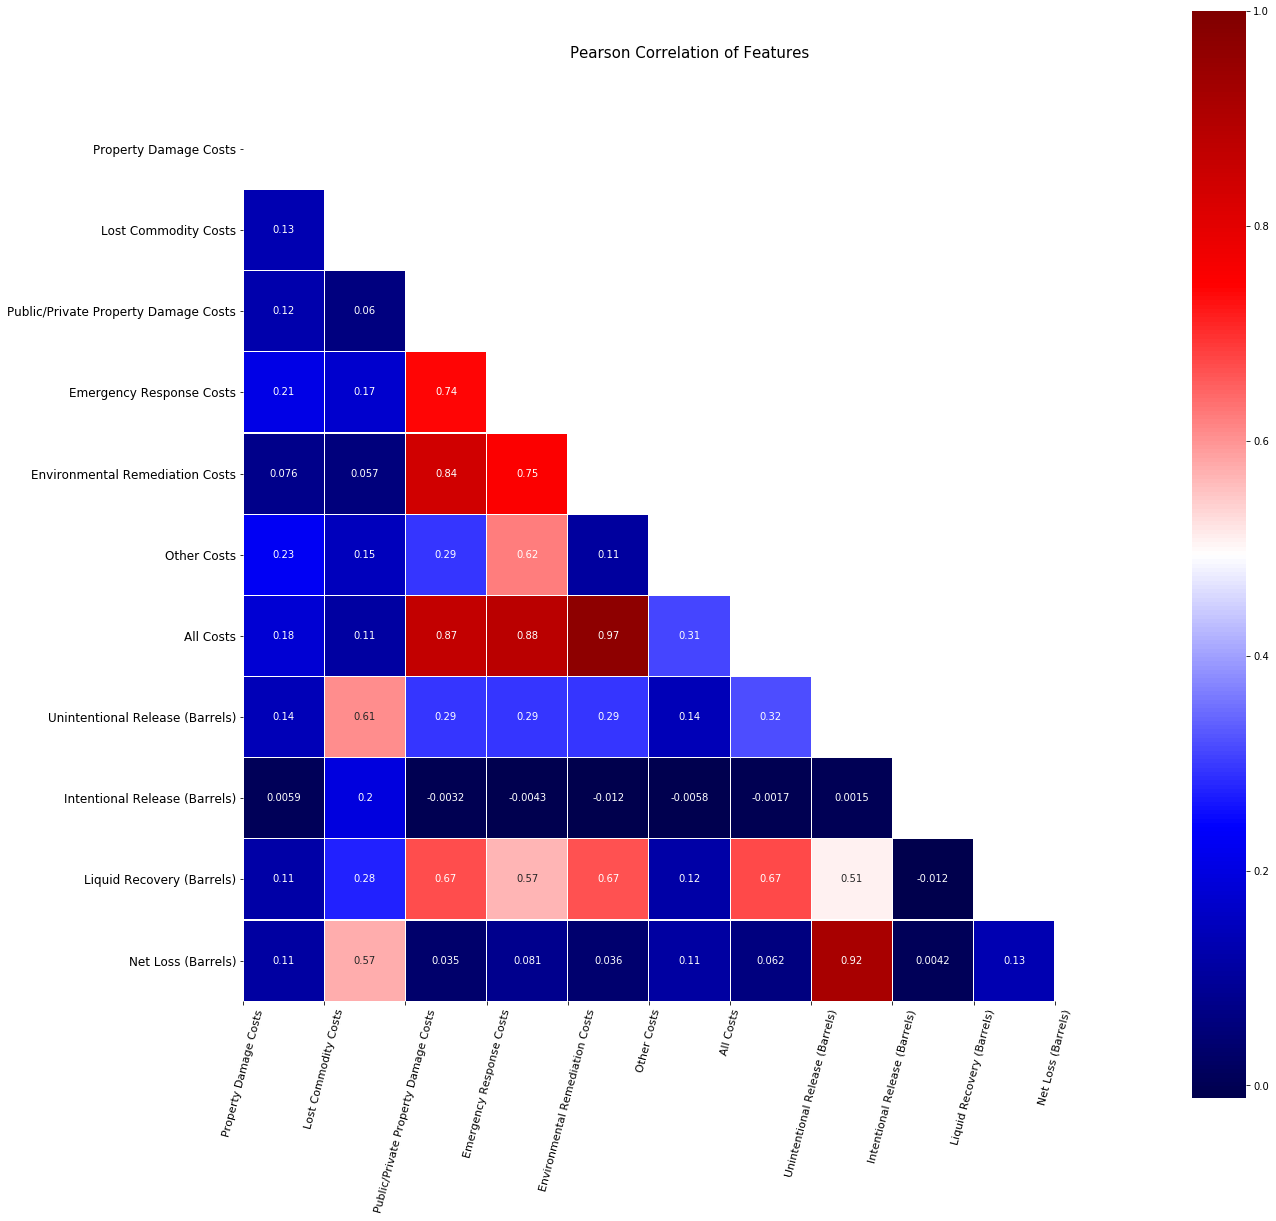

In [131]:
colormap = plot.cm.RdBu

temp = data[['Property Damage Costs',
       'Lost Commodity Costs', 'Public/Private Property Damage Costs',
       'Emergency Response Costs', 'Environmental Remediation Costs',
       'Other Costs', 'All Costs','Unintentional Release (Barrels)', 'Intentional Release (Barrels)',
       'Liquid Recovery (Barrels)', 'Net Loss (Barrels)']]
plot.figure(figsize=(20,20))
corr_data = temp.astype(float).corr()
plot.title('Pearson Correlation of Features', y=1.05, size=15)
mask = np.zeros(corr_data.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sb.heatmap(corr_data,linewidths=0.1,vmax=1.0, square=True, cmap='seismic', linecolor='white', annot=True,mask=mask)
plot.xticks(np.arange(temp.shape[1])-0,rotation = 75, fontsize = 11);
plot.yticks(rotation = 0, fontsize = 12);

# Now let's look at the variables Unintentional Release, Intentional Release, Liquid Recovery, and Net Loss. Seems like there are alot of missing info for 'Intentional Release'                       

In [132]:
print("# null in Unintentional Release :",data['Unintentional Release (Barrels)'].isnull().sum())
print("# null in Intentional Release :",data['Intentional Release (Barrels)'].isnull().sum())
print("# null in Liquid Recovery  :",data['Liquid Recovery (Barrels)'].isnull().sum())
print("# null in Net Loss  :",data['Net Loss (Barrels)'].isnull().sum())

# null in Unintentional Release : 0
# null in Intentional Release : 1514
# null in Liquid Recovery  : 0
# null in Net Loss  : 0


# Let's round all values before hand so that we can explore the relationship between the variables better

In [133]:
data[['Unintentional Release (Barrels)',
       'Intentional Release (Barrels)', 'Liquid Recovery (Barrels)',
       'Net Loss (Barrels)']]\
        = data[['Unintentional Release (Barrels)',
       'Intentional Release (Barrels)', 'Liquid Recovery (Barrels)',
       'Net Loss (Barrels)']].round(decimals=1)

# Here it appears that the relationship between the variables is:

## Net Loss = Unintentional Release + Intentional Release -Liquid Recovery

# However, some rows do not follow this relationship exactly (eg. row 16)

In [134]:
data[['Unintentional Release (Barrels)',
       'Intentional Release (Barrels)', 'Liquid Recovery (Barrels)',
       'Net Loss (Barrels)']].head(15)

Unintentional Release (Barrels)  Intentional Release (Barrels)  \
0                              21.0                            0.1   
4                             700.0                            NaN   
5                            3784.0                            0.0   
6                              35.0                            0.0   
9                               0.5                            0.0   
10                           2237.0                           25.0   
11                              3.0                            0.0   
12                              2.0                            NaN   
13                             53.0                            0.0   
14                             21.0                            0.0   
15                              0.2                            0.0   
16                            445.0                            5.0   
17                              3.5                            0.0   
18                              6.0                            0.0   
19                              0.5                            0.0   

    Liquid Recovery (Barrels)  Net Loss (Barrels)  
0                         0.0                21.0  
4                       698.0                 2.0  
5                      1547.0              2237.0  
6                        30.0                 5.0  
9                         0.5                 0.0  
10                        0.0              2237.0  
11                        3.0                 0.0  
12                        1.0                 1.0  
13                       51.0                 2.0  
14                       21.0                 0.0  
15                        0.2                 0.0  
16                        0.0               445.0  
17                        0.0                 3.5  
18                        6.0                 0.0  
19                        0.0                 0.5

# Let's look at the rows that do not fulfill the relationship exactly. It seems like most of these dont fulfill the relationship because there is a null value for 'Intentional Release'

In [135]:
data.loc[(data['Unintentional Release (Barrels)']+data['Intentional Release (Barrels)']-data['Liquid Recovery (Barrels)'])\
         !=data['Net Loss (Barrels)'],['Unintentional Release (Barrels)',
       'Intentional Release (Barrels)', 'Liquid Recovery (Barrels)',
       'Net Loss (Barrels)']]

Unintentional Release (Barrels)  Intentional Release (Barrels)  \
0                                21.0                            0.1   
4                               700.0                            NaN   
10                             2237.0                           25.0   
12                                2.0                            NaN   
16                              445.0                            5.0   
...                               ...                            ...   
2789                              3.0                            NaN   
2790                              0.2                            NaN   
2792                              1.0                            NaN   
2793                              0.2                            NaN   
2794                              4.0                            NaN   

      Liquid Recovery (Barrels)  Net Loss (Barrels)  
0                           0.0                21.0  
4                         698.0                 2.0  
10                          0.0              2237.0  
12                          1.0                 1.0  
16                          0.0               445.0  
...                         ...                 ...  
2789                        2.0                 1.0  
2790                        0.2                 0.0  
2792                        1.0                 0.0  
2793                        0.2                 0.0  
2794                        4.0                 0.0  

[1706 rows x 4 columns]

# Adding another boolean condition to view rows with not null 'Intentional Release'

In [136]:
data.loc[((data['Unintentional Release (Barrels)']+data['Intentional Release (Barrels)']-data['Liquid Recovery (Barrels)'])\
         !=data['Net Loss (Barrels)']) & (data['Intentional Release (Barrels)'].notna()),['Unintentional Release (Barrels)',
       'Intentional Release (Barrels)', 'Liquid Recovery (Barrels)',
       'Net Loss (Barrels)']]

Unintentional Release (Barrels)  Intentional Release (Barrels)  \
0                                21.0                            0.1   
10                             2237.0                           25.0   
16                              445.0                            5.0   
45                                1.0                          116.0   
54                                7.9                            0.0   
...                               ...                            ...   
2687                           1208.0                          306.0   
2688                              5.0                            0.0   
2714                              0.0                           26.4   
2773                              2.1                           11.0   
2774                              4.2                            8.0   

      Liquid Recovery (Barrels)  Net Loss (Barrels)  
0                           0.0                21.0  
10                          0.0              2237.0  
16                          0.0               445.0  
45                          0.0                 1.0  
54                          7.1                 0.8  
...                         ...                 ...  
2687                        0.0              1208.0  
2688                        4.9                 0.1  
2714                        0.0                 0.0  
2773                        0.0                 2.1  
2774                        0.0                 4.2  

[192 rows x 4 columns]

# It seems like the relationship is not true all the time, but most of the times it holds. Let us estimate rows with no values for 'Intentional Release' using this relationship

In [137]:
data['calculated in release'] = (data['Net Loss (Barrels)']-data['Unintentional Release (Barrels)']+data['Liquid Recovery (Barrels)'])

data.loc[data['Intentional Release (Barrels)'].isnull(),'Intentional Release (Barrels)'] = data.loc[data['Intentional Release (Barrels)'].isnull(),'calculated in release']

data['Intentional Release (Barrels)'] = data['Intentional Release (Barrels)'].round(decimals=1)

print("# null in Intentional Release :",data['Intentional Release (Barrels)'].isnull().sum())



data = data.drop(['calculated in release'],axis=1)

# null in Intentional Release : 0


# Now all of the discrepancies are caused by the inccorect calculation of 'Net Loss', let us drop 'Net Loss' as it is not linearly independant from the other 3 variables

In [138]:
data.loc[(data['Unintentional Release (Barrels)']+data['Intentional Release (Barrels)']-data['Liquid Recovery (Barrels)'])\
         .round(decimals=1)
         !=data['Net Loss (Barrels)'],['Unintentional Release (Barrels)',
       'Intentional Release (Barrels)', 'Liquid Recovery (Barrels)',
       'Net Loss (Barrels)']]

Unintentional Release (Barrels)  Intentional Release (Barrels)  \
0                                21.0                            0.1   
10                             2237.0                           25.0   
16                              445.0                            5.0   
45                                1.0                          116.0   
89                                0.2                            0.0   
...                               ...                            ...   
2649                              5.0                            2.0   
2687                           1208.0                          306.0   
2714                              0.0                           26.4   
2773                              2.1                           11.0   
2774                              4.2                            8.0   

      Liquid Recovery (Barrels)  Net Loss (Barrels)  
0                           0.0                21.0  
10                          0.0              2237.0  
16                          0.0               445.0  
45                          0.0                 1.0  
89                          0.1                 0.2  
...                         ...                 ...  
2649                        0.0                 5.0  
2687                        0.0              1208.0  
2714                        0.0                 0.0  
2773                        0.0                 2.1  
2774                        0.0                 4.2  

[156 rows x 4 columns]

In [139]:
data = data.drop(['Net Loss (Barrels)'],axis=1)

# Let's use descibe() to get a sense of what we are dealing with

In [140]:
data[['Unintentional Release (Barrels)',
       'Intentional Release (Barrels)', 'Liquid Recovery (Barrels)']].describe()

Unintentional Release (Barrels)  Intentional Release (Barrels)  \
count                      2583.000000                    2583.000000   
mean                        220.237050                     111.236624   
std                        1418.445412                    1906.368265   
min                           0.000000                      -0.100000   
25%                           0.500000                       0.000000   
50%                           2.400000                       0.000000   
75%                          20.000000                       0.000000   
max                       30565.000000                   70191.000000   

       Liquid Recovery (Barrels)  
count                2583.000000  
mean                   77.987998  
std                   558.181048  
min                     0.000000  
25%                     0.000000  
50%                     0.900000  
75%                     9.150000  
max                 18245.000000

# Let's fill all negative values in 'Intentional Release' as 0

In [141]:
print(data.loc[data['Intentional Release (Barrels)'] < 0,'Intentional Release (Barrels)'])

data.loc[data['Intentional Release (Barrels)'] < 0,'Intentional Release (Barrels)'] = 0

1400   -0.1
1454   -0.1
2451   -0.1
Name: Intentional Release (Barrels), dtype: float64


# We will have to cut off the tail of all violin plots as they distort the violin plots too much. Let's remove the top 25th Percentile data

In [142]:
un_release_75 = np.percentile(data['Unintentional Release (Barrels)'],75)
recover_75 = np.percentile(data['Liquid Recovery (Barrels)'],75)

# It appears that there is almost no seperation
## (All values belowe the top 25th percentile is 0 for 'Unintentional Release', hence there is no point in plotting a violin graph for this variable)

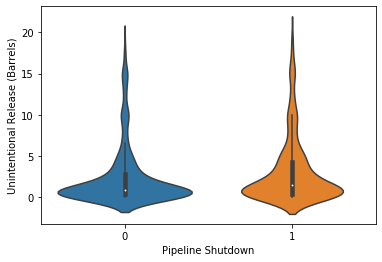

In [143]:
ax = sb.violinplot(x=data.loc[(data['Unintentional Release (Barrels)']<un_release_75),'Pipeline Shutdown'],\
                            y=data.loc[(data['Unintentional Release (Barrels)']<un_release_75),'Unintentional Release (Barrels)'])

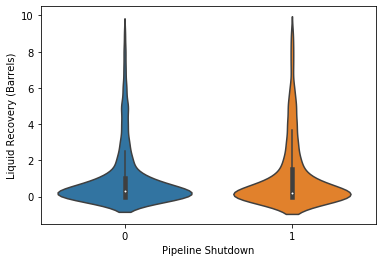

In [144]:
ax = sb.violinplot(x=data.loc[(data['Liquid Recovery (Barrels)']<recover_75),'Pipeline Shutdown'],\
                            y=data.loc[(data['Liquid Recovery (Barrels)']<recover_75),'Liquid Recovery (Barrels)'])

# Let's try equally bin the data and see if we get a good separation

In [145]:
data['un_release band'] = pd.qcut(data['Unintentional Release (Barrels)'],7)
pivot_pipeline('un_release band')

mean               len
                 Pipeline Shutdown Pipeline Shutdown
un_release band                                     
(100.0, 30565.0]          0.737892               351
(15.0, 100.0]             0.653951               367
(4.0, 15.0]               0.582210               371
(1.5, 4.0]                0.527851               377
(0.6, 1.5]                0.466307               371
(-0.001, 0.2]             0.425481               416
(0.2, 0.6]                0.396970               330

In [146]:
data['recovery band'] = pd.qcut(data['Liquid Recovery (Barrels)'],3)
pivot_pipeline('recovery band')

mean               len
               Pipeline Shutdown Pipeline Shutdown
recovery band                                     
(3.5, 18245.0]          0.628505               856
(-0.001, 0.2]           0.520921               956
(0.2, 3.5]              0.465629               771

# Since the seperation is quite decent, lets convert all of the bands to a numerical value!

In [147]:
data['un_release band'] = data['un_release band'].astype(str)
data['recovery band'] = data['recovery band'].astype(str)

# Unintentional Release
data.loc[data['un_release band']=='(0.2, 0.6]','un_release band']= 6 
data.loc[data['un_release band']=='(-0.001, 0.2]','un_release band']= 5
data.loc[data['un_release band']=='(0.6, 1.5]','un_release band']= 4
data.loc[data['un_release band']=='(1.5, 4.0]','un_release band']= 3
data.loc[data['un_release band']=='(4.0, 15.0]','un_release band']= 2
data.loc[data['un_release band']=='(15.0, 100.0]','un_release band']= 1
data.loc[data['un_release band']=='(100.0, 30565.0]','un_release band']= 0

data['un_release band'] = data['un_release band'].astype(int)

# Intentional Release
data.loc[data['Intentional Release (Barrels)']== 0,'Intentional Release (Barrels)']= 0 
data.loc[data['Intentional Release (Barrels)']!= 0 ,'Intentional Release (Barrels)']= 1

data['in_release band'] = data['Intentional Release (Barrels)'].astype(int)

# Recovery
data.loc[data['recovery band']=='(0.2, 3.5]','recovery band']= 0 
data.loc[data['recovery band']=='(-0.001, 0.2]','recovery band']= 1
data.loc[data['recovery band']=='(3.5, 18245.0]','recovery band']= 2

data['recovery band'] = data['recovery band'].astype(int)

# It is quite interesting to see that the higher the unintentional release, the higher chance of pipeline shutdown !! (when unintentional release is 100 to 30565, the probability of shudown is 74% )

In [148]:
pivot_pipeline('un_release band')

mean               len
                Pipeline Shutdown Pipeline Shutdown
un_release band                                    
0                        0.737892               351
1                        0.653951               367
2                        0.582210               371
3                        0.527851               377
4                        0.466307               371
5                        0.425481               416
6                        0.396970               330

In [149]:
pivot_pipeline('in_release band')

mean               len
                Pipeline Shutdown Pipeline Shutdown
in_release band                                    
1                        0.651613               155
0                        0.532949              2428

In [150]:
pivot_pipeline('recovery band')

mean               len
              Pipeline Shutdown Pipeline Shutdown
recovery band                                    
2                      0.628505               856
1                      0.520921               956
0                      0.465629               771

# Now that we have converted all columns to numerical, we can drop the original columns!

In [151]:
data = data.drop(['Unintentional Release (Barrels)', 'Intentional Release (Barrels)', 'Liquid Recovery (Barrels)'],axis=1)


In [152]:
data.columns

Index(['Accident Year', 'Accident Date/Time', 'Operator Name',
       'Pipeline Location', 'Pipeline Type', 'Liquid Type', 'Liquid Subtype',
       'Accident County', 'Accident State', 'Cause Category',
       'Cause Subcategory', 'Liquid Ignition', 'Liquid Explosion',
       'Pipeline Shutdown', 'Public Evacuations', 'Operator Employee Injuries',
       'Operator Contractor Injuries', 'Emergency Responder Injuries',
       'Other Injuries', 'Public Injuries', 'All Injuries',
       'Operator Employee Fatalities', 'Operator Contractor Fatalities',
       'Emergency Responder Fatalities', 'Other Fatalities',
       'Public Fatalities', 'All Fatalities', 'Property Damage Costs',
       'Lost Commodity Costs', 'Public/Private Property Damage Costs',
       'Emergency Response Costs', 'Environmental Remediation Costs',
       'Other Costs', 'All Costs', 'Facility Type', 'cluster label',
       'un_release band', 'recovery band', 'in_release band'],
      dtype='object')

# Now let us look at the Injuries and Fatalities columns. Because there are only 8 and 12 non null values for both respectively, let's look at the non-null rows only.

In [153]:
data.loc[(data['All Injuries'].notna()) | (data['All Fatalities'].notna()) ,['Operator Employee Injuries',
       'Operator Contractor Injuries', 'Emergency Responder Injuries',
       'Other Injuries', 'Public Injuries', 'All Injuries',
       'Operator Employee Fatalities', 'Operator Contractor Fatalities',
       'Emergency Responder Fatalities', 'Other Fatalities',
       'Public Fatalities', 'All Fatalities']]

Operator Employee Injuries  Operator Contractor Injuries  \
93                           1.0                           0.0   
176                          0.0                           0.0   
336                          0.0                           1.0   
392                          1.0                           0.0   
691                          1.0                           0.0   
758                          0.0                           0.0   
856                          0.0                           1.0   
1138                         0.0                           1.0   
1163                         NaN                           NaN   
1338                         0.0                           3.0   
1385                         0.0                           2.0   
2145                         NaN                           NaN   
2717                         0.0                           0.0   
2730                         0.0                           4.0   

      Emergency Responder Injuries  Other Injuries  Public Injuries  \
93                             0.0             0.0              0.0   
176                            0.0             0.0              1.0   
336                            0.0             0.0              0.0   
392                            0.0             0.0              0.0   
691                            0.0             0.0              0.0   
758                            0.0             0.0              3.0   
856                            0.0             0.0              0.0   
1138                           0.0             0.0              0.0   
1163                           NaN             NaN              NaN   
1338                           0.0             0.0              0.0   
1385                           0.0             0.0              0.0   
2145                           NaN             NaN              NaN   
2717                           0.0             0.0              1.0   
2730                           0.0             0.0              0.0   

      All Injuries  Operator Employee Fatalities  \
93             1.0                           NaN   
176            1.0                           0.0   
336            1.0                           NaN   
392            1.0                           0.0   
691            1.0                           NaN   
758            3.0                           0.0   
856            1.0                           0.0   
1138           1.0                           NaN   
1163           NaN                           0.0   
1338           3.0                           NaN   
1385           2.0                           NaN   
2145           NaN                           0.0   
2717           1.0                           0.0   
2730           4.0                           0.0   

      Operator Contractor Fatalities  Emergency Responder Fatalities  \
93                               NaN                             NaN   
176                              0.0                             0.0   
336                              NaN                             NaN   
392                              1.0                             0.0   
691                              NaN                             NaN   
758                              0.0                             0.0   
856                              1.0                             0.0   
1138                             NaN                             NaN   
1163                             0.0                             0.0   
1338                             NaN                             NaN   
1385                             NaN                             NaN   
2145                             0.0                             0.0   
2717                             0.0                             0.0   
2730                             2.0                             0.0   

      Other Fatalities  Public Fatalities  All Fatalities  
93                 NaN     

# Let's create two columns to indicate whether there were injuries or fatalities (1=yes, 0=no)

In [154]:
data.loc[data['All Injuries'].notna(),['injuries']] = 1
data.loc[data['All Fatalities'].notna(),['fatality']] = 1
data.loc[data['All Injuries'].isnull(),['injuries']] = 0
data.loc[data['All Fatalities'].isnull(),['fatality']] = 0

data['injuries'] = data['injuries'].astype(int)
data['fatality'] = data['fatality'].astype(int)

data.loc[(data['All Injuries'].notna()) | (data['All Fatalities'].notna()) ,[ 'All Injuries', 'All Fatalities','injuries','fatality']]

All Injuries  All Fatalities  injuries  fatality
93             1.0             NaN         1         0
176            1.0             1.0         1         1
336            1.0             NaN         1         0
392            1.0             1.0         1         1
691            1.0             NaN         1         0
758            3.0             2.0         1         1
856            1.0             1.0         1         1
1138           1.0             NaN         1         0
1163           NaN             1.0         0         1
1338           3.0             NaN         1         0
1385           2.0             NaN         1         0
2145           NaN             1.0         0         1
2717           1.0             1.0         1         1
2730           4.0             2.0         1         1

# Let's drop all the irrelavent columns now

In [155]:
data = data.drop(['Operator Employee Injuries',
       'Operator Contractor Injuries', 'Emergency Responder Injuries',
       'Other Injuries', 'Public Injuries', 'All Injuries',
       'Operator Employee Fatalities', 'Operator Contractor Fatalities',
       'Emergency Responder Fatalities', 'Other Fatalities',
       'Public Fatalities', 'All Fatalities'],axis=1)

# Let's look at 'Public Evacuation'. There are 332 empty values, we will have to deal with it

In [156]:
print("# null in Net Loss  :",data['Public Evacuations'].isnull().sum())

# null in Net Loss  : 332


In [157]:
data['Public Evacuations'].value_counts()

0.0      2198
1.0         6
2.0         4
12.0        3
5.0         3
7.0         2
25.0        2
8.0         2
13.0        2
4.0         2
6.0         2
30.0        2
60.0        1
75.0        1
32.0        1
83.0        1
23.0        1
9.0         1
40.0        1
3.0         1
470.0       1
10.0        1
700.0       1
21.0        1
16.0        1
11.0        1
37.0        1
17.0        1
15.0        1
19.0        1
150.0       1
70.0        1
34.0        1
47.0        1
61.0        1
Name: Public Evacuations, dtype: int64

# Looks like most of the entries are 0, let us fill all of the NaN values with 0.

In [158]:
data['Public Evacuations'] = data['Public Evacuations'].fillna(0).astype(int)

# Let's create a new column called 'evacuation' to indicated whether an evacuation happened. We will drop 'Public Evacuations' as well.

In [159]:
data.loc[data['Public Evacuations']!=0,'evacuation'] = 1
data.loc[data['Public Evacuations']==0,'evacuation'] = 0

data['evacuation'].value_counts()

data = data.drop(['Public Evacuations'],axis=1)

data['evacuation'] = data['evacuation'].astype(int)

# Let's look at the cost variables now

In [160]:
print("# null in Property Damage Costs :",data['Property Damage Costs'].isnull().sum())
print("# null in Lost Commodity Costs :",data['Lost Commodity Costs'].isnull().sum())
print("# null in Public/Private Property Damage Costs  :",data['Public/Private Property Damage Costs'].isnull().sum())
print("# null in Emergency Response Costs :",data['Emergency Response Costs'].isnull().sum())
print("# null in Environmental Remediation Costs :",data['Environmental Remediation Costs'].isnull().sum())
print("# null in Other Costs :",data['Other Costs'].isnull().sum())
print("# null in All Costs  :",data['All Costs'].isnull().sum())


# null in Property Damage Costs : 7
# null in Lost Commodity Costs : 4
# null in Public/Private Property Damage Costs  : 10
# null in Emergency Response Costs : 6
# null in Environmental Remediation Costs : 8
# null in Other Costs : 16
# null in All Costs  : 0


# Let's drop 'All Costs' and 'Environmental Remediation Costs' because of aforementioned collinearity issue

In [161]:
data = data.drop(['All Costs','Environmental Remediation Costs'],axis=1)

# Let's fill all of the missing values with zero since it appears that the missings values likely to mean '0' rather than missing data

In [162]:
data.loc[data['Property Damage Costs'].isnull(), ['Property Damage Costs', 'Lost Commodity Costs',
       'Public/Private Property Damage Costs', 'Emergency Response Costs','Other Costs']]

Property Damage Costs  Lost Commodity Costs  \
64                     NaN                  46.0   
141                    NaN                 150.0   
152                    NaN                 784.0   
197                    NaN                   NaN   
218                    NaN                   NaN   
231                    NaN                 120.0   
249                    NaN                   NaN   

     Public/Private Property Damage Costs  Emergency Response Costs  \
64                                    NaN                   10999.0   
141                                   0.0                       NaN   
152                                   NaN                       NaN   
197                                   NaN                    3500.0   
218                                   NaN                    5000.0   
231                                 500.0                    2000.0   
249                                   NaN                     540.0   

     Other Costs  
64           NaN  
141          NaN  
152          NaN  
197          NaN  
218          NaN  
231          NaN  
249          NaN

In [163]:
data[['Property Damage Costs', 'Lost Commodity Costs',
       'Public/Private Property Damage Costs', 'Emergency Response Costs', 'Other Costs', ]] = \
data[['Property Damage Costs', 'Lost Commodity Costs',
       'Public/Private Property Damage Costs', 'Emergency Response Costs', 'Other Costs', ]].fillna(0)

print("# null in Property Damage Costs :",data['Property Damage Costs'].isnull().sum())
print("# null in Lost Commodity Costs :",data['Lost Commodity Costs'].isnull().sum())
print("# null in Public/Private Property Damage Costs  :",data['Public/Private Property Damage Costs'].isnull().sum())
print("# null in Emergency Response Costs :",data['Emergency Response Costs'].isnull().sum())
print("# null in Other Costs :",data['Other Costs'].isnull().sum())




# null in Property Damage Costs : 0
# null in Lost Commodity Costs : 0
# null in Public/Private Property Damage Costs  : 0
# null in Emergency Response Costs : 0
# null in Other Costs : 0


In [164]:
data[['Property Damage Costs', 'Lost Commodity Costs',
       'Public/Private Property Damage Costs', 'Emergency Response Costs', 'Other Costs']].describe()

Property Damage Costs  Lost Commodity Costs  \
count           2.583000e+03          2.583000e+03   
mean            1.188427e+05          1.042296e+04   
std             9.033723e+05          6.625641e+04   
min             0.000000e+00          0.000000e+00   
25%             1.000000e+02          2.000000e+01   
50%             3.500000e+03          1.000000e+02   
75%             2.722850e+04          8.000000e+02   
max             2.700000e+07          1.417839e+06   

       Public/Private Property Damage Costs  Emergency Response Costs  \
count                          2.583000e+03              2.583000e+03   
mean                           2.698775e+04              3.129292e+05   
std                            5.444318e+05              4.796880e+06   
min                            0.000000e+00              0.000000e+00   
25%                            0.000000e+00              0.000000e+00   
50%                            0.000000e+00              2.850000e+03   
75%                            0.000000e+00              1.700000e+04   
max                            2.300000e+07              1.770000e+08   

        Other Costs  
count  2.583000e+03  
mean   3.675664e+04  
std    6.421059e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    2.235000e+07

# Let's look at the distribution of the cost models. We will take the log(x+1) of the cost as they are exponentially distributed

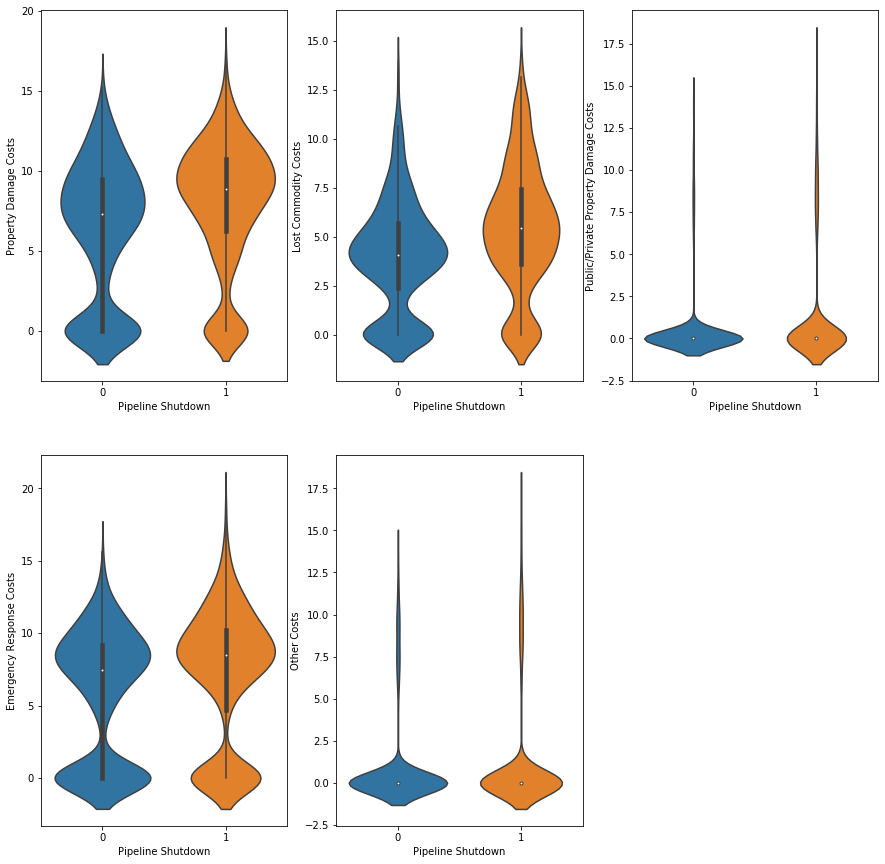

In [165]:
cost_features = data[['Property Damage Costs', 'Lost Commodity Costs',
       'Public/Private Property Damage Costs', 'Emergency Response Costs', 'Other Costs']]

list(enumerate(cost_features))

plot.figure(figsize=(15,15))

for i in enumerate(cost_features):
    
    plot.subplot(2,3,(i[0]+1))
    sb.violinplot(x='Pipeline Shutdown',y=np.log(data[i[1]]+1),data=data)

# The distribution of the cost variables is visibly different for cases where there is a pipeline shutdown.Specifically, Property Damage Costs and Lost Commodity Costs give very good seperation. Let's bin them and label them accordingly and see the seperation. 

# Property Damage Costs binning

In [166]:
data['pdamage_costband'] = pd.qcut(data['Property Damage Costs'],5).astype(str)

pdamage_index = list(pivot_pipeline('pdamage_costband').index)

for i in range(len(pdamage_index)):
    
    data.loc[data['pdamage_costband']==pdamage_index[i],'pdamage_costband']= i
    
pivot_pipeline('pdamage_costband')

mean               len
                 Pipeline Shutdown Pipeline Shutdown
pdamage_costband                                    
0                         0.682785               517
1                         0.629703               505
2                         0.523719               527
3                         0.476471               510
4                         0.391221               524

# Lost Commodity Costs Binning

In [167]:
data['lc_costband'] = pd.qcut(data['Lost Commodity Costs'],5).astype(str)

lc_index = list(pivot_pipeline('lc_costband').index)

for i in range(len(lc_index)):
    
    data.loc[data['lc_costband']==lc_index[i],'lc_costband']= i
    
pivot_pipeline('lc_costband')

mean               len
            Pipeline Shutdown Pipeline Shutdown
lc_costband                                    
0                    0.725338               517
1                    0.650485               515
2                    0.479691               517
3                    0.429924               528
4                    0.415020               506

# Public/Private Property Damage Costs Binning

In [168]:
data.loc[data['Public/Private Property Damage Costs']==0, 'ppp_damageband'] = 0
data.loc[data['Public/Private Property Damage Costs']!=0, 'ppp_damageband'] = 1

pivot_pipeline('ppp_damageband')

mean               len
               Pipeline Shutdown Pipeline Shutdown
ppp_damageband                                    
1.0                     0.739837               246
0.0                     0.519042              2337

# Emergency Costs Binnning

In [169]:
data['er_costband'] = pd.qcut(data['Emergency Response Costs'],3).astype(str)

er_index = list(pivot_pipeline('er_costband').index)

for i in range(len(er_index)):
    
    data.loc[data['er_costband']==er_index[i],'er_costband']= i
    
pivot_pipeline('er_costband')

mean               len
            Pipeline Shutdown Pipeline Shutdown
er_costband                                    
0                    0.636469               861
1                    0.542892               816
2                    0.445916               906

# Other Costs has Binning

In [170]:
data.loc[data['Other Costs']==0, 'other_costband'] = 0
data.loc[data['Other Costs']!=0, 'other_costband'] = 1

pivot_pipeline('other_costband')

mean               len
               Pipeline Shutdown Pipeline Shutdown
other_costband                                    
1.0                     0.571930               285
0.0                     0.536118              2298

In [171]:
data = data.drop(['Property Damage Costs', 'Lost Commodity Costs',
       'Public/Private Property Damage Costs', 'Emergency Response Costs', 'Other Costs'],axis=1)

data.columns

Index(['Accident Year', 'Accident Date/Time', 'Operator Name',
       'Pipeline Location', 'Pipeline Type', 'Liquid Type', 'Liquid Subtype',
       'Accident County', 'Accident State', 'Cause Category',
       'Cause Subcategory', 'Liquid Ignition', 'Liquid Explosion',
       'Pipeline Shutdown', 'Facility Type', 'cluster label',
       'un_release band', 'recovery band', 'in_release band', 'injuries',
       'fatality', 'evacuation', 'pdamage_costband', 'lc_costband',
       'ppp_damageband', 'er_costband', 'other_costband'],
      dtype='object')

In [172]:
data[['pdamage_costband', 'lc_costband',
       'ppp_damageband', 'er_costband', 'other_costband',
       ]] = \
data[['pdamage_costband', 'lc_costband',
       'ppp_damageband', 'er_costband','other_costband',
       ]].astype(int) 

# Now finally we will look at 'Accident Date/Time'

In [173]:
data.loc[:,['Accident Date/Time']]

Accident Date/Time
0       1/1/2010 7:15 AM
4       1/7/2010 1:00 PM
5      1/8/2010 11:38 PM
6      1/9/2010 12:15 AM
9      1/11/2010 2:30 PM
...                  ...
2790  12/27/2016 8:40 AM
2791  12/28/2016 4:20 PM
2792  12/29/2016 6:40 AM
2793   1/3/2017 10:00 AM
2794    1/9/2017 7:40 AM

[2583 rows x 1 columns]

# Let's try to visualize the 'Accident Date/Time' data and see how accidents happen in different periods of time.

# Some interesting trends:

# (1) Number of Accidents peak at 9AM and 2PM - Perhaps Pipeline Operators/Workers tend to make mistakes when they have just started work and after having lunch
# (2) The number of accidents seem to decrease from Monday to Friday...hmmmm looks like people are not to keen to work at the start of the week
# (3) The number of accidents has been rising from 2010 to 2016

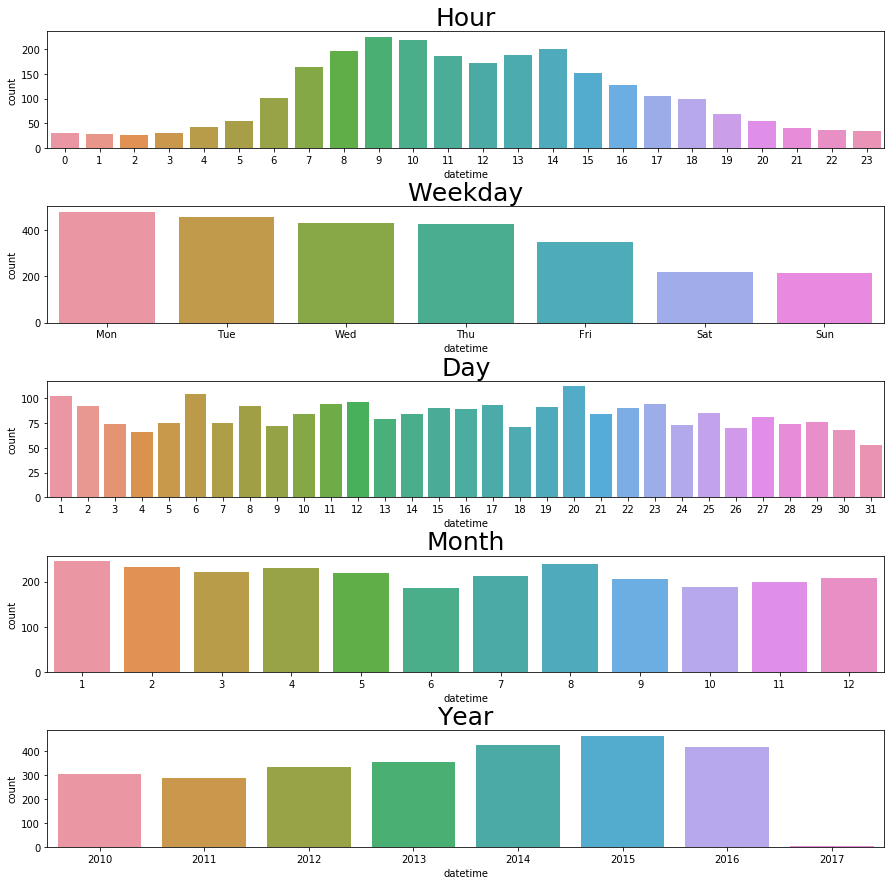

In [174]:
data['datetime'] = pd.to_datetime(data['Accident Date/Time'], format="%m/%d/%Y %I:%M %p")

get_hour = lambda x: x.hour
get_weekday = lambda x: x.weekday()
get_day = lambda x: x.day
get_month = lambda x: x.month
get_year = lambda x: x.year

weekday_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

plot.figure(figsize=(15,15))
sb.set_palette("Reds") # For some reason, if this line is not included the 'year' and 'weekday' plots have a different colour??
plot.subplot(5,1,1)
ax = sb.countplot(x=data['datetime'].apply(get_hour), data=data).set_title('Hour',fontsize=25)
plot.subplot(5,1,2)
ax = sb.countplot(x=data['datetime'].apply(get_weekday).map(weekday_map),order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], \
data=data).set_title('Weekday',fontsize=25)
plot.subplot(5,1,3)
ax = sb.countplot(x=data['datetime'].apply(get_day), data=data).set_title('Day',fontsize=25)
plot.subplot(5,1,4)
ax = sb.countplot(x=data['datetime'].apply(get_month), data=data).set_title('Month',fontsize=25)
plot.subplot(5,1,5)
ax = sb.countplot(x=data['datetime'].apply(get_year), data=data).set_title('Year',fontsize=25)
# Create spacing between subplots
plot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=2, hspace=0.5)


# Let's create a function that would plot the % of Pipeline Shutdown for different time periods(hour,day,month....etc) as that is the variable that we are interested in predicting
## Percent stacked barplot adapted from: https://python-graph-gallery.com/13-percent-stacked-barplot/

In [175]:
data['hour'] = data['datetime'].apply(get_hour)
data['weekday'] = data['datetime'].apply(get_weekday).map(weekday_map)
data['day'] = data['datetime'].apply(get_day)
data['month'] = data['datetime'].apply(get_month)
data['year'] = data['datetime'].apply(get_year)

def percentage_over_time(var):

    shut = pd.pivot_table(data=data,index=[var],values=['Pipeline Shutdown'],aggfunc=['sum'])
    shut = shut.loc[:,('sum','Pipeline Shutdown')[0]]
    count = pd.pivot_table(data=data,index=[var],values=['Pipeline Shutdown'],aggfunc=['count'])
    count = count.loc[:,('count','Pipeline Shutdown')[0]]
    noshut = count-shut

    shut = shut.iloc[:,0].values
    noshut = noshut.iloc[:,0].values

    r = list(pd.pivot_table(data=data,index=[var],values=['Pipeline Shutdown'],aggfunc=['sum']).index)

    raw_data = {'greenBars': noshut, 'orangeBars': shut,'blueBars': np.zeros(len(shut)).tolist()}
    df = pd.DataFrame(raw_data)

    # From raw value to percentage
    totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
    greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
    orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
    blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]

    # plot

    plt.figure(figsize=(15,3))

    barWidth = 0.85
    names = r
    # Create green Bars
    plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth,label="No Shutdown")
    # Create orange Bars
    plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth ,label="Shutdown")
    # Create blue Bars
    plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)

    # Custom x axis
    plt.xticks(r, names)
    plt.xlabel(var,fontsize=25)
    plt.ylabel("%")

    # Add a legend
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

    # Show graphic
    plt.show()

# Now let's look at the result. Looks like the proportion of Pipeline Shutdown does vary with time. Let's use all these variables for our model trainning!

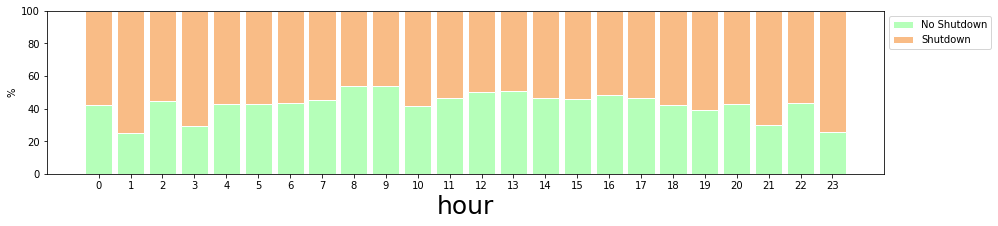

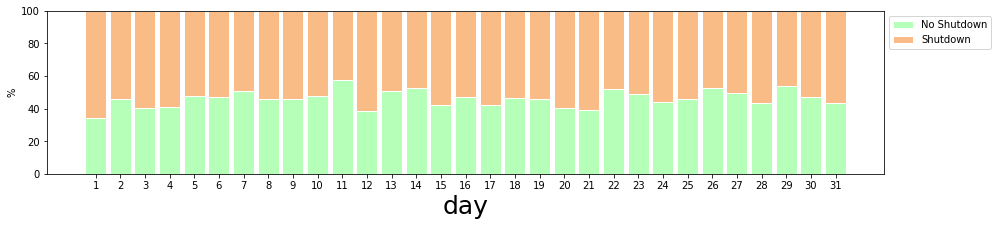

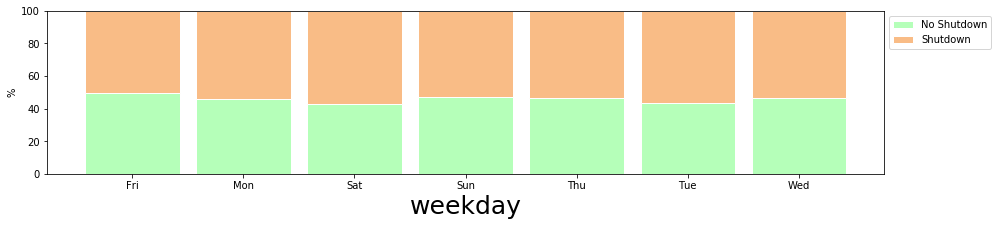

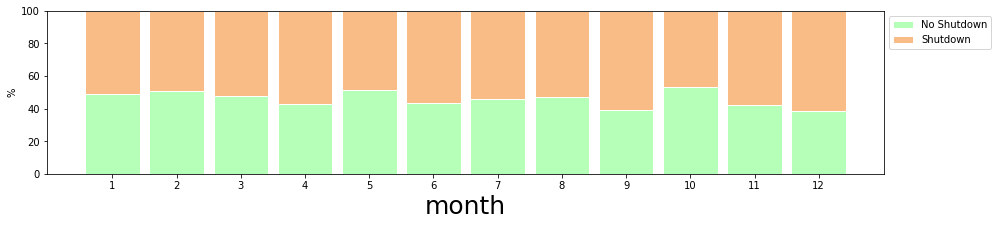

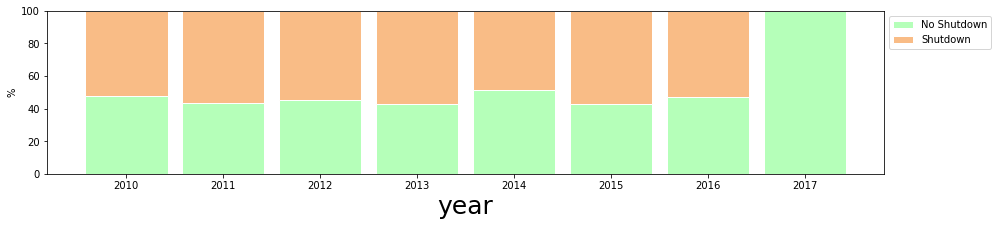

In [176]:
time_list = ['hour','day','weekday','month','year']

for i in range(len(time_list)):
    percentage_over_time(time_list[i])

# Let's re-order all of the columns by the % shutdown for hour, day, and month.

In [177]:
def percentage_over_time_r(var,inv_r):

    shut = pd.pivot_table(data=data,index=[var],values=['Pipeline Shutdown'],aggfunc=['sum'])
    shut = shut.loc[:,('sum','Pipeline Shutdown')[0]]
    count = pd.pivot_table(data=data,index=[var],values=['Pipeline Shutdown'],aggfunc=['count'])
    count = count.loc[:,('count','Pipeline Shutdown')[0]]
    noshut = count-shut

    shut = shut.iloc[:,0].values
    noshut = noshut.iloc[:,0].values

    raw_data = {'greenBars': shut, 'orangeBars': noshut,'blueBars': np.zeros(len(shut)).tolist()}
    df = pd.DataFrame(raw_data)

    # From raw value to percentage
    totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
    greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
    orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
    blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]

    # plot

    plt.figure(figsize=(15,3))

    barWidth = 0.85
    names = inv_r
    # Create green Bars
    plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth,label="Shutdown")
    # Create orange Bars
    plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth ,label="No Shutdown")
    # Create blue Bars
    plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)

    # Custom x axis
    plt.xticks(r,names)
    plt.xlabel(var,fontsize=25)
    plt.ylabel("%")

    # Add a legend
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

    # Show graphic
    plt.show()
    
def pivot_reorder_map(var):

    pivot_order = pivot_pipeline(var).index.values
    min_time =  min(pivot_pipeline(var).index.values)
    length_list = len(pivot_order)
    array_order = range(min_time,(min_time+length_list))

    output_map = {}

    for i in range(length_list):

        dict_entry = {pivot_order[i]:array_order[i]}
        output_map.update(dict_entry)
    
    return output_map

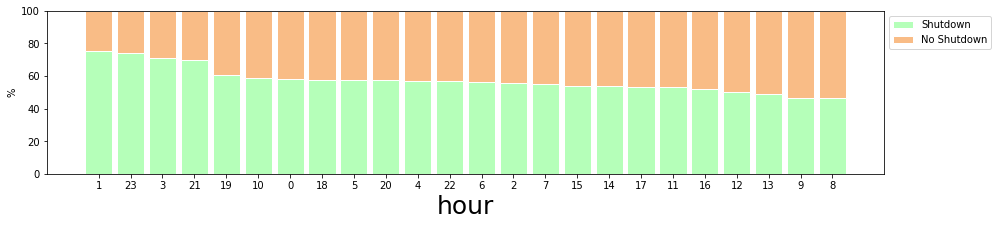

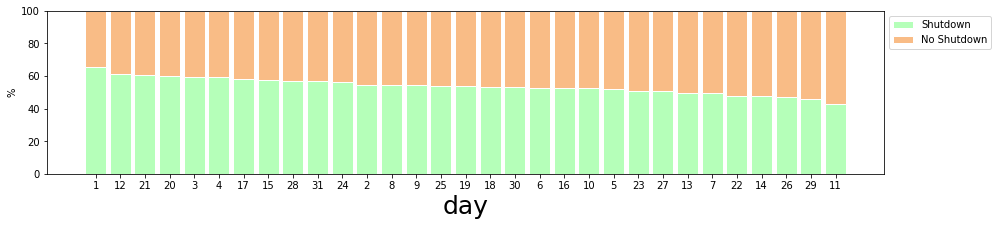

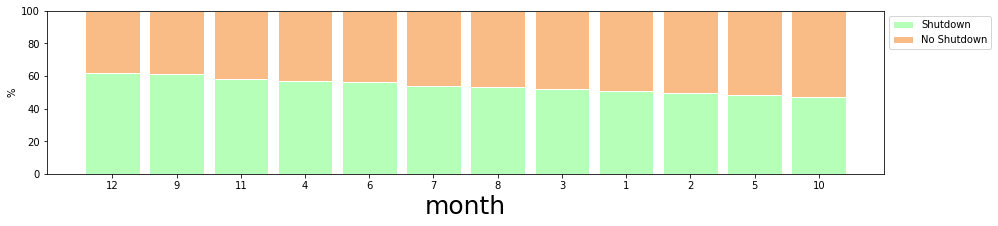

In [178]:
time_list = ['hour','day','month']

for i in range(len(time_list)):
    
    # Pass in the index manually to display the original index instead of the reordered index
    
    r = list(pd.pivot_table(data=data,index=[time_list[i]],values=['Pipeline Shutdown'],aggfunc=['sum']).index)
    
    order_mapping = pivot_reorder_map(time_list[i])
    
    inv_map = {v: k for k, v in order_mapping.items()}
    
    inv_r = [inv_map[k] for k in r]
    data[time_list[i]] = pivot_reorder(time_list[i])
    percentage_over_time_r(time_list[i],inv_r)

# In order to convert all of the values to ordinal values where the index represent some kind of order - we can use the function that reindexes each variable based on % shutdown

In [179]:
time_list = ['hour','day','weekday','month','year']

for i in range(len(time_list)):
    data[time_list[i]] = pivot_reorder(time_list[i])

# Let's check if the intended effect was realised..... Seems like we are good here!

In [180]:
pivot_pipeline('weekday').head(7)

mean               len
        Pipeline Shutdown Pipeline Shutdown
weekday                                    
0                0.573394               218
1                0.567686               458
2                0.538462               481
3                0.537209               430
4                0.532710               428
5                0.529954               217
6                0.504274               351

# Note that because future data will not have the year 2010-2017 anymore, we can delete the column 'year'. Also, let's delete the 'Accident Date/Time' and 'datetime' columns as we have no furthur use for them! 

In [181]:
data = data.drop(['Accident Year','year','Accident Date/Time','datetime'],axis=1)


# Finnally, the data is clean. But before that, we must check if any of the variables are correlated to prevent colinearity. To do this we will use Pearson Correlation along with a heat map. 


# Looks like  Lc_costband (Lost Commodity costs) and un_release band (Unintentional Release) are highly correlated (r =0.74). We will have to engineer a new feature with them to prevent collinearity!


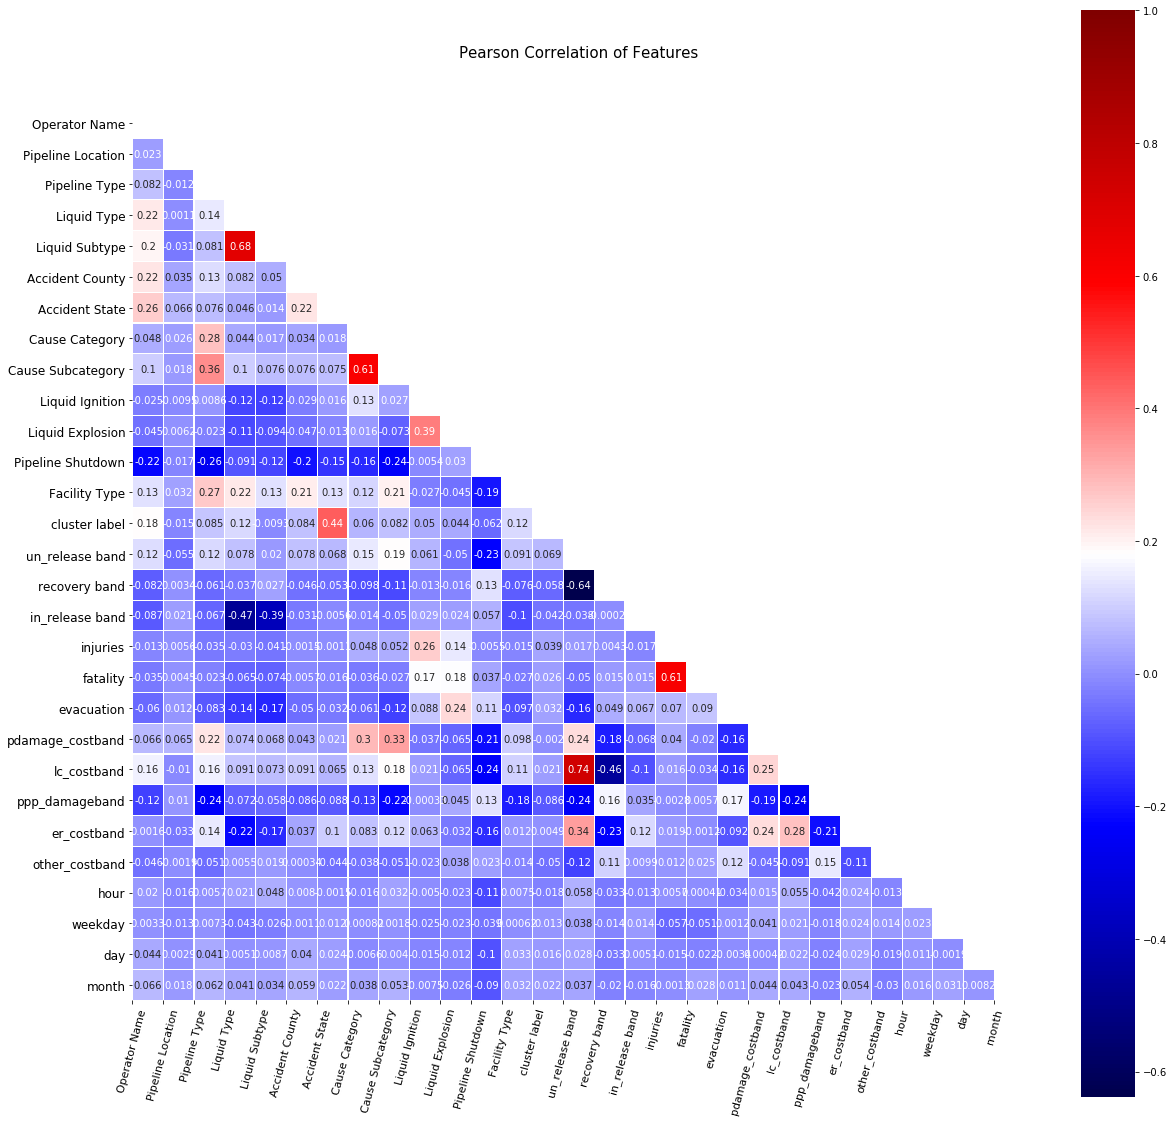

In [182]:
colormap = plot.cm.RdBu
plot.figure(figsize=(20,20))
corr_data = data.astype(float).corr()
plot.title('Pearson Correlation of Features', y=1.05, size=15)
mask = np.zeros(corr_data.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sb.heatmap(corr_data,linewidths=0.1,vmax=1.0, square=True, cmap='seismic', linecolor='white', annot=True,mask=mask)
plot.xticks(np.arange(data.shape[1])-0,rotation = 75, fontsize = 11);
plot.yticks(rotation = 0, fontsize = 12);


# Because of the high collinearity of some of the variables, we will engineer some variables to reduce their effect on the model.

In [183]:
data.columns

Index(['Operator Name', 'Pipeline Location', 'Pipeline Type', 'Liquid Type',
       'Liquid Subtype', 'Accident County', 'Accident State', 'Cause Category',
       'Cause Subcategory', 'Liquid Ignition', 'Liquid Explosion',
       'Pipeline Shutdown', 'Facility Type', 'cluster label',
       'un_release band', 'recovery band', 'in_release band', 'injuries',
       'fatality', 'evacuation', 'pdamage_costband', 'lc_costband',
       'ppp_damageband', 'er_costband', 'other_costband', 'hour', 'weekday',
       'day', 'month'],
      dtype='object')

# Feature Engineering

In [184]:
data['lc_cost*un_release'] = data['lc_costband']*data['un_release band']
data = data.drop(['lc_costband','un_release band'],axis=1)
pivot_reorder('lc_cost*un_release')


0        1
4        1
5        1
6        2
9       13
        ..
2790    10
2791     1
2792     9
2793    10
2794     7
Name: lc_cost*un_release, Length: 2583, dtype: int64

# Before creating the model, lets convert the dataset to X and Y (predictors and target variable) do a train-test split.

In [185]:
X = data.drop(['Pipeline Shutdown'],axis=1)
Y = data['Pipeline Shutdown']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("X train shape:" , X_train.shape,'|| X test shape:', X_test.shape )
print("Y train shape:" , Y_train.shape,'|| Y test shape:', Y_test.shape  )

X train shape: (2066, 27) || X test shape: (517, 27)
Y train shape: (2066,) || Y test shape: (517,)


# Before we start, let's create a dataframe to track the classifier performance

In [186]:
track = pd.DataFrame ({})

# We will train our model now :)))

# I will try a number of different models just to explore which one describes the data best. Let's start with the simplest of all - Gaussian Naive Bayes.

In [187]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X,Y,cv=5)
print(cv)
print("Mean Accuracy:",cv.mean())

gnb.fit(X_train,Y_train)
score =gnb.score(X_test,Y_test)

new_row = {'name':'GaussianNB', 'cv performance':cv.mean(),'test perfornmance':score}
#append row to the dataframe
track = track.append(new_row, ignore_index=True)


[0.62088975 0.51450677 0.59574468 0.55813953 0.58914729]
Mean Accuracy: 0.5756856041863465


# Lets try the classic Logistic Regression Now

In [188]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X,Y,cv=5)
print(cv)
print("Mean Accuracy:",cv.mean())

lr.fit(X_train,Y_train)
score = lr.score(X_test, Y_test)

new_row = {'name':'LogisticRegression', 'cv performance':cv.mean(),'test perfornmance':score}
#append row to the dataframe
track = track.append(new_row, ignore_index=True)

[0.71179884 0.69632495 0.7040619  0.68604651 0.69186047]
Mean Accuracy: 0.6980185326795915


# And my favourite - Decision Tree

In [189]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X,Y,cv=5)
print(cv)
print("Mean Accuracy:",cv.mean())

dt.fit(X_train,Y_train)
score = dt.score(X_test, Y_test)

new_row = {'name':'DecisionTreeClassifier', 'cv performance':cv.mean(),'test perfornmance':score}
#append row to the dataframe
track = track.append(new_row, ignore_index=True)

[0.58413926 0.59187621 0.57253385 0.63372093 0.59108527]
Mean Accuracy: 0.5946711049135591


# Also we will try K-nearest Neighbours

In [190]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X,Y,cv=5)
print(cv)
print("Mean Accuracy:",cv.mean())

knn.fit(X_train,Y_train)
score = knn.score(X_test, Y_test)

new_row = {'name':'KNeighborsClassifier', 'cv performance':cv.mean(),'test perfornmance':score}
#append row to the dataframe
track = track.append(new_row, ignore_index=True)

[0.64603482 0.61121857 0.6615087  0.59302326 0.60271318]
Mean Accuracy: 0.6228997046166764


# Let's try Random Forest too

In [191]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X,Y,cv=5)
print(cv)
print("Mean Accuracy:",cv.mean())

rf.fit(X_train,Y_train)
score = rf.score(X_test, Y_test)

new_row = {'name':'RandomForestClassifier', 'cv performance':cv.mean(),'test perfornmance':score}
#append row to the dataframe
track = track.append(new_row, ignore_index=True)

[0.69439072 0.67117988 0.6827853  0.69379845 0.66666667]
Mean Accuracy: 0.6817642031397597


# Maybe we try SVC too

In [192]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X,Y,cv=5)
print(cv)
print("Mean Accuracy:",cv.mean())

svc.fit(X_train,Y_train)
score = svc.score(X_test, Y_test)

new_row = {'name':'SVC', 'cv performance':cv.mean(),'test perfornmance':score}
#append row to the dataframe
track = track.append(new_row, ignore_index=True)

[0.70019342 0.67117988 0.68665377 0.66860465 0.6627907 ]
Mean Accuracy: 0.6778844856281767


# We should do XG boost as well

In [193]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1,use_label_encoder=False,eval_metric='logloss')
cv = cross_val_score(xgb,X,Y,cv=5)
print(cv)
print("Mean Accuracy:",cv.mean())

xgb.fit(X_train,Y_train)
score = xgb.score(X_test, Y_test)

new_row = {'name':'xgboost', 'cv performance':cv.mean(),'test perfornmance':score}
#append row to the dataframe
track = track.append(new_row, ignore_index=True)

[0.65764023 0.67504836 0.66924565 0.63953488 0.64341085]
Mean Accuracy: 0.6569759944821796


# Last one.....A Soft Voting Classifier consisting of all above classifiers except GNB, DT, KNN, and XGboost (because they have dissapointing accuracy)

In [194]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('rf',rf),('svc',svc)], voting = 'soft') 
cv = cross_val_score(voting_clf,X,Y,cv=5)
print(cv)
print("Mean Accuracy:",cv.mean())

voting_clf.fit(X_train,Y_train)
score = voting_clf.score(X_test, Y_test)

new_row = {'name':'VotingClassifier', 'cv performance':cv.mean(),'test perfornmance':score}
#append row to the dataframe
track = track.append(new_row, ignore_index=True)

[0.71566731 0.67311412 0.69825919 0.68410853 0.6879845 ]
Mean Accuracy: 0.6918267284422652


In [195]:
track[['name','cv performance','test perfornmance']]

name  cv performance  test perfornmance
0              GaussianNB        0.575686           0.617021
1      LogisticRegression        0.698019           0.696325
2  DecisionTreeClassifier        0.594671           0.591876
3    KNeighborsClassifier        0.622900           0.615087
4  RandomForestClassifier        0.681764           0.696325
5                     SVC        0.677884           0.671180
6                 xgboost        0.656976           0.653772
7        VotingClassifier        0.691827           0.704062

# Alright, now let's try to tune the parameters for some of the models. To optimize the parameters, I adopted a Grid Search Method (basically brute forcing the optimal parameters). 
# Code adapted from: https://www.kaggle.com/kenjee/titanic-project-example
## (I wanted to optimize for the SVC Classifier as well, but sadly my CPU is not powerful enough and doing so would kill my cheap Huawei laptop lol)

In [196]:
from sklearn.model_selection import GridSearchCV 

#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

## Note: I have already pre-optimized the model and have set paramgrid to use the parameters that were found to be best

In [197]:
track2 = pd.DataFrame ({})

In [198]:
new_row = {'optimized performance':"-",'test optimized perf.': "-"}
#append row to the dataframe
track2 = track2.append(new_row, ignore_index=True)

In [199]:
lr = LogisticRegression()
param_grid = {'max_iter' : [5000],
              'penalty' : ['l2'],
              'C' : [0.615848211066026],
              'solver' : ['saga']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,Y_train)
clf_performance(best_clf_lr,'Logistic Regression')

score = best_clf_lr.score(X_test, Y_test)
new_row = {'optimized performance':best_clf_lr.best_score_,'test optimized perf.': score}
#append row to the dataframe
track2 = track2.append(new_row, ignore_index=True)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.1s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.4s finished


Logistic Regression
Best Score: 0.6955316933946264
Best Parameters: {'C': 0.615848211066026, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'saga'}


In [200]:
dt = tree.DecisionTreeClassifier(random_state = 1)
param_grid = {'criterion' : ['gini'],
              'splitter' : ['best'],
              'max_depth' : range(5,10),
              'min_samples_split' : range(1,10),
              'min_samples_leaf' : range(1,10),
              'max_features' : ['auto'],
             }

clf_dt = GridSearchCV(dt, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_dt = clf_dt.fit(X_train,Y_train)
clf_performance(best_clf_dt,'DecisionTreeClassifier')

score = best_clf_dt.score(X_test, Y_test)
new_row = {'optimized performance':best_clf_dt.best_score_,'test optimized perf.': score}
#append row to the dataframe
track2 = track2.append(new_row, ignore_index=True)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1890 tasks      | elapsed:    3.8s


DecisionTreeClassifier
Best Score: 0.6432630335356938
Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 9, 'splitter': 'best'}


[Parallel(n_jobs=-1)]: Done 2025 out of 2025 | elapsed:    4.2s finished


In [201]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : range(30,60,2),
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto'],
              'p' : [1,2]}

clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train,Y_train)
clf_performance(best_clf_knn,'KNEighborsClassifier')

score = best_clf_knn.score(X_test, Y_test)
new_row = {'optimized performance':best_clf_knn.best_score_,'test optimized perf.': score}
#append row to the dataframe
track2 = track2.append(new_row, ignore_index=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 285 out of 300 | elapsed:    3.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.3s finished


KNEighborsClassifier
Best Score: 0.6640769203775835
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 46, 'p': 1, 'weights': 'distance'}


In [202]:
rf = RandomForestClassifier()
param_grid =  {'n_estimators': [430],
               'criterion':['gini'],
              'bootstrap': [True],
              'max_depth': [15],
              'max_features': ['sqrt'],
              'min_samples_leaf': [2,3],
              'min_samples_split': [2,3]}

clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train,Y_train)
clf_performance(best_clf_rf,'RandomForestClassifier')

score = best_clf_rf.score(X_test, Y_test)
new_row = {'optimized performance':best_clf_rf.best_score_,'test optimized perf.': score}
#append row to the dataframe
track2 = track2.append(new_row, ignore_index=True)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.0s finished


RandomForestClassifier
Best Score: 0.6892491607303691
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 430}


In [203]:
svc = SVC(probability = True)
param_grid = tuned_parameters = {'kernel': ['rbf'],
                                  'gamma': [1e-05],
                                  'C': [1000.0]}
                             
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train,Y_train)
clf_performance(best_clf_svc,'SVC')

score = best_clf_svc.score(X_test, Y_test)
new_row = {'optimized performance':best_clf_svc.best_score_,'test optimized perf.': score}
#append row to the dataframe
track2 = track2.append(new_row, ignore_index=True)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


SVC
Best Score: 0.6882724497315507
Best Parameters: {'C': 1000.0, 'gamma': 1e-05, 'kernel': 'rbf'}


In [204]:
# Use randomized search to have some idea of where to search using gridsearch since XGB has too many parameters,
# then use normal Grid Search to refine parameters
#from sklearn.model_selection import RandomizedSearchCV 
xgb = XGBClassifier(random_state = 1,use_label_encoder=False,eval_metric='logloss')

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.5],
    'max_depth': [5],
    'reg_alpha': [0],
    'reg_lambda': [2],
    'subsample': [0.7],
    'learning_rate':[.01],
    'gamma':[0.1],
    'min_child_weight':[0.1],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train,Y_train)
clf_performance(best_clf_xgb,'XGB')

#clf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = True, n_jobs = -1)
#best_clf_xgb_rnd = clf_xgb_rnd.fit(X_train,Y_train)
#clf_performance(best_clf_xgb_rnd,'XGB')

score = best_clf_xgb.score(X_test, Y_test)
new_row = {'optimized performance':best_clf_xgb.best_score_,'test optimized perf.': score}
#append row to the dataframe
track2 = track2.append(new_row, ignore_index=True)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    5.2s finished


XGB
Best Score: 0.6906914178100618
Best Parameters: {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 0.1, 'n_estimators': 550, 'reg_alpha': 0, 'reg_lambda': 2, 'sampling_method': 'uniform', 'subsample': 0.7}


In [205]:
new_row = {'optimized performance':"-",'test optimized perf.': "-"}
#append row to the dataframe
track2 = track2.append(new_row, ignore_index=True)

# Looks like the KNN, Random forest, SVC, and XGboost improved in terms of performance! The tunning of hyperparameters did not overfit as well as we can see from the 'test optimized perf.' column

In [206]:
table = pd.concat([track, track2], axis=1)
table.columns
table[['name','cv performance','test perfornmance','optimized performance','test optimized perf.']]

name  cv performance  test perfornmance  \
0              GaussianNB        0.575686           0.617021   
1      LogisticRegression        0.698019           0.696325   
2  DecisionTreeClassifier        0.594671           0.591876   
3    KNeighborsClassifier        0.622900           0.615087   
4  RandomForestClassifier        0.681764           0.696325   
5                     SVC        0.677884           0.671180   
6                 xgboost        0.656976           0.653772   
7        VotingClassifier        0.691827           0.704062   

  optimized performance test optimized perf.  
0                     -                    -  
1              0.695532             0.698259  
2              0.643263              0.59381  
3              0.664077              0.67118  
4              0.689249             0.702128  
5              0.688272             0.690522  
6              0.690691             0.702128  
7                     -                    -

# Lets try to do a Voting Classifier with the tuned models

In [207]:
best_lr = best_clf_lr.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',best_lr),('rf',best_rf),('svc',best_svc),('xgb',best_xgb)], voting = 'soft') 
cv = cross_val_score(voting_clf,X_train,Y_train,cv=5)
print(cv)
print("Mean Accuracy:",cv.mean())

voting_clf.fit(X_train,Y_train)
score = voting_clf.score(X_test, Y_test)

print("test performance:", score)

C:\Users\San\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[0.72705314 0.72397094 0.68280872 0.67554479 0.64891041]
Mean Accuracy: 0.691657601384941
test performance: 0.7156673114119922


# It seems like the best classifier is Random Forest.

# Let's look at the confusion matrix of the voting classifier. Let's use a function someone else has created to visualize the Confusion Matrix.

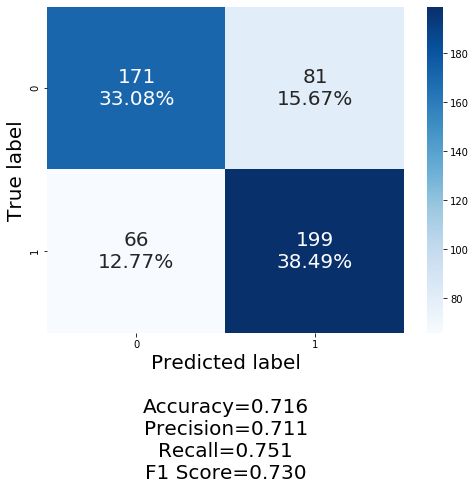

In [208]:
from sklearn.metrics import confusion_matrix

y_pred = voting_clf.predict(X_test)
y_true = Y_test
cf_matrix = confusion_matrix(y_true, y_pred)

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sb.heatmap(cf,annot=box_labels,annot_kws={"size": 20},fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label',fontsize=20)
        plt.xlabel('Predicted label' + stats_text,fontsize=20)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        
make_confusion_matrix(cf_matrix, figsize = (8,6))

# Conclusion

# Let's look at the relative importance of each variable by visualizing the feature importance. 
# Here, we achieve our goal of seeing which factors affect the decision to shutdown a pipeline:

# (1) The strongest factor is Lost Commodity Cost* Unintentional Release Costs 
### - This is not too suprising given that if the bigger the leak is, the more reason there is to shut the pipeline to stop releasing hydrocarbon into the surrounding.
# (2) The next factor is Operator Name 
### - This is abit suprising as I expected pipeline shutdown to be fairly standard accross different companies and to be a moderate factor of pipeline shutdown. Perhaps different companies have different safety standards? (ENBRIDGE PIPELINES (OZARK) L.L.C.' has the lowest chance of shutting down the pipeline while HARVEST PIPELINE COMPANY' shutdown almost 90% of the time
# (3) The 3rd strongest factor is Cause Subcategory 
### - the causes that results in highest chance of pipeline shutdown are events that expose more people to danger (Excavation Damage, Construction related ) while on the other hand, events that have low exposure (Equipment failure, Operational mistakes, etc.) give lower chance of pipeline shutdown.
# (4) The time when the accident happens is a major factor in determining pipeline shutdown as well, with the Day, Hour, and Month being the 4th, 5th, 7th strongest factors of Pipeline Shutdown.
### It seems like there is a correlation between the accident time and the % of pipeline shutdown. During hours when there are few accidents, the pipeline has a tendency to shutdown where as during hours when there is high occurance of accidents the pipeline tends to not shutdown. For day and month, there appears to be no pattern but some day or months have a higher % of shutdowns.
# (5) The county in which the accident happened influences pipeline shutdown as well...
### I suspect this is because of the different degree at which each county is populated.
# (6) Suprisingly - The costs variables do not influence pipeline shutdown decisions very much at all 
### - for major oil spills we all know it does, but for the average pipeline oil spill inccident it is not a big concern apparently.


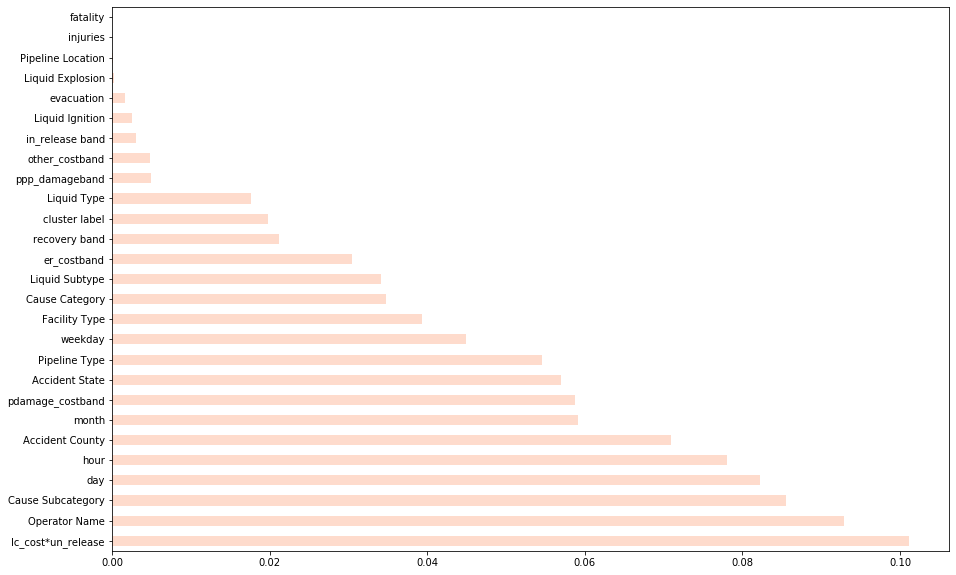

In [209]:
best_rf = best_clf_rf.best_estimator_.fit(X_train,Y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
plot.figure(figsize=(15,10))
feat_importances.nlargest(45).plot(kind='barh')


# -----------------------------------End of Project------------------------------------